In [25]:
#-- IMPORTING MODULES --
import numpy as np
import mpmath as mp

import math
import matplotlib.colors as mc
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from scipy.optimize import fsolve
import scipy.misc
from scipy.misc import derivative
import scipy.interpolate
from scipy.interpolate import griddata
from scipy.integrate import quad, trapz, cumtrapz, romberg, fixed_quad, odeint, ode
from scipy import linalg
from numpy.linalg import inv
from scipy.special import gamma, hyp1f1
from scipy.interpolate import interp1d
import time
from scipy.signal import savgol_filter

#Atropy cosmology modules
import astropy.units as astrou
from astropy.cosmology import Planck18_arXiv_v2 as cosmo
from astropy.cosmology import z_at_value
import pdfCBC as pm 
from pdfCBC import inverse_transf_sampling


# Import mycode
import sys
path = '/Users/feixu/OneDrive - The University of Chicago/Documents/Research'
sys.path.append(path+'/mycode/')
sys.path.append(path+'/lensingFei/')
import constantfei 
from optical_depthfei import *
from RBBH_fei import *
import gw 
from MC_fei import *


#Export results folder
import sys
dir_base=sys.path[0]
dir_out1=dir_base+"/plots_py_gw_lensing/"
dir_out2=dir_base+"/fits_py_gw_lensing/"

In [26]:
area = integrate.quad(lambda x: dR_dz_org(x), 0, 8)[0]
def dR_dz_org_PDF(z):
    return dR_dz_org(z)/area

dR_dz_org_PDF = np.vectorize(dR_dz_org_PDF)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  """Entry point for launching an IPython kernel.


In [27]:
z_rand_arr = ITM(dR_dz_org_PDF, [0, 15], int(5e5))
#print(z_rand_arr)

### P($\mu$) change with $\sigma_*$?

In [28]:
sigma_starm = 300e3
taurand_arr = tau_spec(z_rand_arr, sigma_starm)

randnum = np.random.uniform(0, 1, int(5e5))
zrandl = z_rand_arr[np.where(taurand_arr > randnum)]

In [29]:
result_list = []
for zrand0 in zrandl:
    print(zrand0)
    result_list.append(MCfei(zrand0, sigma_starm))

3.3900070557053446
Source: [13.49445914] 9.572037051240843 3.3900070557053446
Galaxy q: 0.6470023069304234
Source: [26.49973433] 8.427569403056077 3.3900070557053446
Galaxy q: 0.587449541665163
1.7247966391430234
Source: [27.83468697] 20.525858496423652 1.7247966391430234
Galaxy q: 0.37853799254335474
Source: [37.22618511] 12.10235026151459 1.7247966391430234
Galaxy q: 0.8500454754747352
3.503586596435726
Source: [14.61898271] 10.261495737366658 3.503586596435726
Galaxy q: 0.36774455893490476
Source: [15.89875943] 11.887125600018653 3.503586596435726
Galaxy q: 0.8340848058418906
2.795718297286668
Source: [15.49787907] 14.478573988306803 2.795718297286668
Galaxy q: 0.872483371280609
Source: [15.87231342] 15.610560582121373 2.795718297286668
Galaxy q: 0.6737222045464825
3.7577616140776517
Source: [12.00008279] 10.600262704026932 3.7577616140776517
Galaxy q: 0.4745717188099622
Source: [16.33333774] 9.56376116295419 3.7577616140776517
Galaxy q: 0.27368489882429436
2.6891640668971175
Source

Galaxy q: 0.5572447600207051
Source: [34.80851702] 19.3351239887458 1.249601409708191
Galaxy q: 0.47877863992074166
1.7148760851848521
Source: [5.16723766] 5.162204772813688 1.7148760851848521
Galaxy q: 0.27285927080745265
Source: [16.04998687] 12.335400794250678 1.7148760851848521
Galaxy q: 0.8159082981924929
5.246655892301022
Source: [15.50553423] 14.106928152884736 5.246655892301022
Galaxy q: 0.528080496012293
Source: [25.19224945] 6.297489731558835 5.246655892301022
Galaxy q: 0.605709050393757
5.964971611115231
Source: [23.51226101] 14.373382514446567 5.964971611115231
Galaxy q: 0.5103937286146892
Source: [29.88563823] 27.52746853641944 5.964971611115231
Galaxy q: 0.39755835196549083
4.206870011461115
Source: [37.55586345] 17.91866239945176 4.206870011461115
Galaxy q: 0.6098647291122713
Source: [15.25687983] 12.36474399787058 4.206870011461115
Galaxy q: 0.2745463684940098
3.8513848775493886
Source: [16.41271339] 5.472326498648293 3.8513848775493886
Galaxy q: 0.5539001484956676
Sour

Galaxy q: 0.6367416331952865
2.302519645798747
Source: [30.8693874] 28.96491648998272 2.302519645798747
Galaxy q: 0.24629473731845763
Source: [12.0226811] 8.318886361245958 2.302519645798747
Galaxy q: 0.24388573863258645
1.6977002130922259
Source: [33.78742524] 24.613736678096423 1.6977002130922259
Galaxy q: 0.5734805408909157
Source: [16.89645676] 10.909835901401433 1.6977002130922259
Galaxy q: 0.8013043263764325
4.262310990743594
Source: [11.83938346] 10.190180244555616 4.262310990743594
Galaxy q: 0.264459371830119
Source: [17.07771636] 14.843090985004212 4.262310990743594
Galaxy q: 0.5983926653466743
1.6264265427311315
Source: [6.67499536] 5.252355785341912 1.6264265427311315
Galaxy q: 0.22437109769250418
Source: [15.53946239] 11.55534192529463 1.6264265427311315
Galaxy q: 0.733286710436671
3.908816044137791
Source: [11.71602383] 10.499445891452538 3.908816044137791
Galaxy q: 0.4127590676138798
Source: [8.19503071] 8.012266328216036 3.908816044137791
Galaxy q: 0.556608162240165
2.67

Galaxy q: 0.5321780190957349
Source: [35.85007996] 15.512638461241599 3.919295074422524
Galaxy q: 0.3006456863360719
3.748810772368473
Source: [36.38609939] 20.23838470817325 3.748810772368473
Galaxy q: 0.6530399074891633
Source: [27.10687094] 7.162332295966005 3.748810772368473
Galaxy q: 0.20018224958023012
3.5367072329897975
Source: [39.80603363] 7.340972474131549 3.5367072329897975
Galaxy q: 0.6069023679323644
Source: [20.80175678] 16.376007911385045 3.5367072329897975
Galaxy q: 0.4082049045408568
2.0871447366403757
Source: [22.70108917] 18.579712284971958 2.0871447366403757
Galaxy q: 0.6656411665057247
Source: [31.88432501] 14.631089714239613 2.0871447366403757
Galaxy q: 0.5454142893456093
2.552418923166881
Source: [23.12022596] 22.05442118203921 2.552418923166881
Galaxy q: 0.3392224421964669
Source: [16.85690107] 7.104019862031025 2.552418923166881
Galaxy q: 0.6645650607724822
5.3564316762279365
Source: [5.0746676] 5.047306037574023 5.3564316762279365
Galaxy q: 0.36803589364870837

Galaxy q: 0.7006523154822599
4.6127228603236174
Source: [37.20345605] 10.551018220482435 4.6127228603236174
Galaxy q: 0.2948552726948771
Source: [18.70970329] 13.384471270847513 4.6127228603236174
Galaxy q: 0.7197477728089872
2.5056548736317934
Source: [18.13796695] 15.770593590065367 2.5056548736317934
Galaxy q: 0.42231762489189584
Source: [24.46238471] 23.78195786138242 2.5056548736317934
Galaxy q: 0.5587347848199176
4.2296787338207515
Source: [6.39263354] 5.507793252062613 4.2296787338207515
Galaxy q: 0.3105390607873709
Source: [5.90371961] 5.128316917240996 4.2296787338207515
Galaxy q: 0.35917448622218473
2.364769672207512
Source: [17.25697736] 13.660452028590003 2.364769672207512
Galaxy q: 0.7690038267337973
Source: [40.67344181] 7.601257662627225 2.364769672207512
Galaxy q: 0.7701223091490677
4.7010615986843005
Source: [8.70666659] 8.296387916568337 4.7010615986843005
Galaxy q: 0.8175908645307317
Source: [14.08573901] 10.77102667875833 4.7010615986843005
Galaxy q: 0.6179126931013

Galaxy q: 0.3283009489331138
Source: [16.4537559] 16.051496180640477 2.3422660426731445
Galaxy q: 0.5270769158414538
4.307041900617563
Source: [12.72956006] 11.255961652911635 4.307041900617563
Galaxy q: 0.5724463878955561
Source: [41.4043429] 5.123202576739145 4.307041900617563
Galaxy q: 0.3598963136950417
3.392838813176398
Source: [31.88527016] 19.824082632903604 3.392838813176398
Galaxy q: 0.8981453339039264
Source: [30.82989384] 21.694794873868474 3.392838813176398
Galaxy q: 0.248205515503363
4.825484163302903
Source: [12.74417323] 9.504601166877876 4.825484163302903
Galaxy q: 0.45827813295894293
Source: [10.15581103] 9.680125823471148 4.825484163302903
Galaxy q: 0.5546931936370444
3.420515926073616
Source: [29.38338411] 27.583084709414972 3.420515926073616
Galaxy q: 0.27411805856851046
Source: [25.80310422] 9.250294877615282 3.420515926073616
Galaxy q: 0.41750010153652395
3.4382074205377284
Source: [39.77012166] 23.27553172171629 3.4382074205377284
Galaxy q: 0.4087474557340014
Sou

Galaxy q: 0.7461691987901904
3.6289675108932697
Source: [6.37221028] 5.893599610602947 3.6289675108932697
Galaxy q: 0.4645368549618619
Source: [25.24354852] 12.27609334810563 3.6289675108932697
Galaxy q: 0.7797510191191247
2.8601429220870203
Source: [5.66799647] 5.587825254456073 2.8601429220870203
Galaxy q: 0.7582617857967365
Source: [7.75961301] 5.145948470163463 2.8601429220870203
Galaxy q: 0.6823806618513464
3.862618117608805
Source: [21.92280494] 21.09510515639261 3.862618117608805
Galaxy q: 0.3439006145363023
Source: [7.12182882] 5.420170962820739 3.862618117608805
Galaxy q: 0.7205402637974985
4.166808449429018
Source: [33.83584906] 12.524970986721016 4.166808449429018
Galaxy q: 0.4662346119208285
Source: [20.55989741] 15.441191415498501 4.166808449429018
Galaxy q: 0.6524375024640789
2.4579681188865994
Source: [18.46220739] 15.125200169748624 2.4579681188865994
Galaxy q: 0.6501265292769337
Source: [9.8904997] 6.921548756556735 2.4579681188865994
Galaxy q: 0.2818984094524093
1.246

Galaxy q: 0.4160764344566018
Source: [23.5295992] 13.125451902209406 3.630124590129329
Galaxy q: 0.31187167480867195
4.210927137572931
Source: [33.5043606] 19.87764222414456 4.210927137572931
Galaxy q: 0.5556690282265414
Source: [34.52662662] 18.68274380960336 4.210927137572931
Galaxy q: 0.4920078846407827
2.98128499939436
Source: [38.09612175] 8.759682098185166 2.98128499939436
Galaxy q: 0.6326023851203828
Source: [38.69281813] 8.625315124686285 2.98128499939436
Galaxy q: 0.3147972700630959
6.040594113980739
Source: [34.97042908] 31.502883629932963 6.040594113980739
Galaxy q: 0.5218986438538771
Source: [7.66913156] 6.0560207834466295 6.040594113980739
Galaxy q: 0.5217645186969935
2.217205729373214
Source: [31.36949042] 19.47536057179711 2.217205729373214
Galaxy q: 0.2262635046042103
Source: [10.0576953] 8.87773662446657 2.217205729373214
Galaxy q: 0.6026151868226723
2.541941241070491
Source: [12.01583317] 8.78897464012112 2.541941241070491
Galaxy q: 0.7833488420270546
Source: [30.8263

Galaxy q: 0.8190364094612429
2.6358249093142674
Source: [40.13005885] 24.350702386193202 2.6358249093142674
Galaxy q: 0.8722202659611646
Source: [26.05162186] 25.901667002524256 2.6358249093142674
Galaxy q: 0.5304380292927375
2.380528299334673
Source: [38.13213546] 31.973025237799895 2.380528299334673
Galaxy q: 0.9399434276600354
Source: [18.73647012] 9.155932971573439 2.380528299334673
Galaxy q: 0.5182057266267116
5.111533908698335
Source: [5.90801399] 5.184080007003862 5.111533908698335
Galaxy q: 0.4096061895338783
Source: [5.36804069] 5.31935729480432 5.111533908698335
Galaxy q: 0.3864216184710665
1.6511381956338922
Source: [13.96362191] 6.41363748658217 1.6511381956338922
Galaxy q: 0.5432450062072003
Source: [28.77510816] 13.155703857062495 1.6511381956338922
Galaxy q: 0.2389347243566302
4.173109113046735
Source: [25.33512617] 13.881795901628443 4.173109113046735
Galaxy q: 0.8937322641235438
Source: [17.78646112] 15.997185823227335 4.173109113046735
Galaxy q: 0.22915523800671178
4.

Galaxy q: 0.6937938841148339
Source: [9.35235216] 5.325358163964164 3.420623773435238
Galaxy q: 0.5226465683611763
2.9235497884668606
Source: [10.95883427] 7.253503133327602 2.9235497884668606
Galaxy q: 0.3586724578913242
Source: [35.09802402] 32.70806033404507 2.9235497884668606
Galaxy q: 0.5628989227785222
4.799667876338956
Source: [27.57329191] 12.08802109430507 4.799667876338956
Galaxy q: 0.7860403559355061
Source: [39.91562178] 28.862021070949062 4.799667876338956
Galaxy q: 0.5240410693693847
2.5427951441496277
Source: [23.67964596] 13.928300929175572 2.5427951441496277
Galaxy q: 0.3019012821638898
Source: [20.68262127] 5.195098446849031 2.5427951441496277
Galaxy q: 0.3698050060698286
6.660194121465444
Source: [17.73829535] 6.31369409547398 6.660194121465444
Galaxy q: 0.8088954859946174
Source: [15.60353745] 10.805718949721232 6.660194121465444
Galaxy q: 0.5126822452255582
3.269647037352984
Source: [7.33636228] 6.7498583676103365 3.269647037352984
Galaxy q: 0.732638836045046
Sourc

Galaxy q: 0.5486007907598692
1.7444340523866921
Source: [16.27246314] 12.582189176908651 1.7444340523866921
Galaxy q: 0.4672041308097661
Source: [15.73381285] 11.877365280566917 1.7444340523866921
Galaxy q: 0.5750155739847451
3.7398378293150443
Source: [16.97740288] 9.419565661519226 3.7398378293150443
Galaxy q: 0.4636364554805915
Source: [29.42423099] 12.994492197329421 3.7398378293150443
Galaxy q: 0.4607467361434916
2.7076091304876106
Source: [9.87482256] 6.7131821897223904 2.7076091304876106
Galaxy q: 0.7927642658624299
Source: [36.389921] 23.757931853700093 2.7076091304876106
Galaxy q: 0.6529651795823656
2.013677204620493
Source: [26.49271008] 16.08598442738777 2.013677204620493
Galaxy q: 0.7863410744827928
Source: [23.33172192] 8.046021007314572 2.013677204620493
Galaxy q: 0.7104560358466336
1.9016751173364856
Source: [17.72113194] 6.691295894218657 1.9016751173364856
Galaxy q: 0.5423843781792228
Source: [10.0504274] 8.121841770215363 1.9016751173364856
Galaxy q: 0.68241224527343


Galaxy q: 0.6732576096693352
Source: [16.54300101] 7.298671944541393 4.8376894915874225
Galaxy q: 0.5690948272199736
3.554748719081809
Source: [17.66901136] 15.341099991071802 3.554748719081809
Galaxy q: 0.5411208713147833
Source: [33.35121893] 10.901482273871814 3.554748719081809
Galaxy q: 0.8655079714829383
6.32614563535478
Source: [41.22647276] 38.96904065905294 6.32614563535478
Galaxy q: 0.6922791922149738
Source: [7.31332156] 5.136474505747637 6.32614563535478
Galaxy q: 0.9219991906287853
4.9109053284992665
Source: [15.77605368] 14.533863256745256 4.9109053284992665
Galaxy q: 0.5382916019696766
Source: [36.75328294] 15.213367124975168 4.9109053284992665
Galaxy q: 0.27288845489284974
3.870991496254978
Source: [11.83825732] 8.448787393597248 3.870991496254978
Galaxy q: 0.31470830423259166
Source: [6.26402707] 5.039139848665807 3.870991496254978
Galaxy q: 0.67101411287359
4.667285296894921
Source: [21.32409509] 15.633991843555641 4.667285296894921
Galaxy q: 0.7350097764988227
Source:

Galaxy q: 0.5414003947022592
2.0223299057523594
Source: [30.98188789] 22.961008132727454 2.0223299057523594
Galaxy q: 0.23237037612673073
Source: [5.89287522] 5.056300651354495 2.0223299057523594
Galaxy q: 0.7610964638782782
3.225371785464414
Source: [6.42571381] 5.941813698439381 3.225371785464414
Galaxy q: 0.8948696972814528
Source: [34.39966598] 12.01423413237131 3.225371785464414
Galaxy q: 0.5499687901953352
0.5193216850223925
Source: [16.03215667] 7.594150201517097 0.5193216850223925
Galaxy q: 0.4477954831538302
Source: [30.50544048] 22.235425209055112 0.5193216850223925
Galaxy q: 0.7807994238592244
4.3379737360031765
Source: [24.14719531] 5.75681258586744 4.3379737360031765
Galaxy q: 0.5732757656893037
Source: [9.77586612] 7.723927661902023 4.3379737360031765
Galaxy q: 0.30607409670536845
2.4256704405346423
Source: [14.12859691] 13.734040494330586 2.4256704405346423
Galaxy q: 0.4622542147873898
Source: [14.06857028] 5.138135510230809 2.4256704405346423
Galaxy q: 0.331386207929150

Source: [12.23345846] 10.754859378066126 2.3082166374488753
Galaxy q: 0.7198975627037401
Source: [33.66478693] 15.642050806426893 2.3082166374488753
Galaxy q: 0.4295196865004932
3.3707309664591047
Source: [15.14278707] 8.301043429837883 3.3707309664591047
Galaxy q: 0.5782770235005734
Source: [6.94115109] 6.134950824884844 3.3707309664591047
Galaxy q: 0.5921995683161857
4.079679422946645
Source: [27.34967422] 26.3494496343507 4.079679422946645
Galaxy q: 0.5878816991781934
Source: [36.27775667] 35.212625688805346 4.079679422946645
Galaxy q: 0.2528241407233369
6.257528131725582
Source: [39.51054594] 13.83588412032264 6.257528131725582
Galaxy q: 0.6573251813601294
Source: [7.91570936] 6.222058761074867 6.257528131725582
Galaxy q: 0.4460986798186245
2.246121198306895
Source: [21.72230578] 6.862137028483264 2.246121198306895
Galaxy q: 0.22695342010356456
Source: [9.16792728] 5.591454094264132 2.246121198306895
Galaxy q: 0.45257501942338163
2.4682614608881366
Source: [11.17119645] 10.96074842

Galaxy q: 0.2651423066435349
Source: [13.98708552] 6.798758553445861 1.1461883520202063
Galaxy q: 0.2691882045197611
1.7671041497564326
Source: [20.21658421] 16.17269163688842 1.7671041497564326
Galaxy q: 0.2245721390251879
Source: [30.1071997] 12.152855817077885 1.7671041497564326
Galaxy q: 0.6223758282278038
4.742549055165713
Source: [39.59169718] 37.291518261333444 4.742549055165713
Galaxy q: 0.34141391929149445
Source: [27.27088584] 14.26701856389473 4.742549055165713
Galaxy q: 0.5741814670235906
2.150144709673066
Source: [18.40884229] 11.517914675792653 2.150144709673066
Galaxy q: 0.44187349495345773
Source: [29.57758819] 19.22131766839295 2.150144709673066
Galaxy q: 0.38350726505189725
4.497189172988765
Source: [36.71573445] 6.53711646754673 4.497189172988765
Galaxy q: 0.4878511121215652
Source: [37.6653516] 15.314001840562144 4.497189172988765
Galaxy q: 0.6559644435635965
4.158842401290208
Source: [34.74649211] 19.96601730724521 4.158842401290208
Galaxy q: 0.2023997547122932
Sou

Galaxy q: 0.7513291517950068
3.7156747061092514
Source: [37.07572515] 29.3284747800497 3.7156747061092514
Galaxy q: 0.43359787325059407
Source: [29.58941676] 23.810994501773138 3.7156747061092514
Galaxy q: 0.5346952935297816
5.367752253947898
Source: [13.02345708] 10.39295818235353 5.367752253947898
Galaxy q: 0.7570192800128677
Source: [16.7643005] 13.036008394723348 5.367752253947898
Galaxy q: 0.2742942133241476
2.7267602589758737
Source: [31.01782333] 20.922784179581186 2.7267602589758737
Galaxy q: 0.6148843456033366
Source: [16.64477154] 12.639738788321147 2.7267602589758737
Galaxy q: 0.589775834949119
1.8408117635636363
Source: [5.10101844] 5.086700485230565 1.8408117635636363
Galaxy q: 0.3256952646761728
Source: [6.46332525] 5.857046717253995 1.8408117635636363
Galaxy q: 0.31984845335442635
1.00345095318627
Source: [6.69710288] 6.664398243858797 1.00345095318627
Galaxy q: 0.5684666402799031
Source: [18.93233515] 17.785814377357205 1.00345095318627
Galaxy q: 0.9991747206907441
2.22

Galaxy q: 0.755733951215907
Source: [39.49939764] 7.6096144705156625 2.6467801088362406
Galaxy q: 0.4658376405577892
6.53752213071454
Source: [19.88498412] 7.258434389033815 6.53752213071454
Galaxy q: 0.39514092777641807
Source: [29.16196392] 13.53917061031862 6.53752213071454
Galaxy q: 0.27138596593541797
2.4531426072689344
Source: [9.60615912] 5.674155170837318 2.4531426072689344
Galaxy q: 0.5476028352816231
Source: [12.30759886] 7.64596436619971 2.4531426072689344
Galaxy q: 0.2721698966905991
3.735822449886321
Source: [29.57803723] 16.457061808862104 3.735822449886321
Galaxy q: 0.729291804073827
Source: [25.79530162] 23.51265685655661 3.735822449886321
Galaxy q: 0.5942744672893647
2.189985918062082
Source: [22.54301575] 22.114147640997842 2.189985918062082
Galaxy q: 0.6014144026051207
Source: [8.77886422] 8.525192014866247 2.189985918062082
Galaxy q: 0.3999131783954486
4.440453482167837
Source: [39.65659154] 27.853277794263274 4.440453482167837
Galaxy q: 0.5871915155457582
Source: [

Galaxy q: 0.3450312026672061
2.3262815573147155
Source: [22.93622221] 12.072914167642747 2.3262815573147155
Galaxy q: 0.8673097268318457
Source: [7.15623479] 6.328146716687216 2.3262815573147155
Galaxy q: 0.6770405710469005
5.519713443035358
Source: [14.63903288] 11.858912556807805 5.519713443035358
Galaxy q: 0.31206976021933763
Source: [35.07654361] 16.861111278665486 5.519713443035358
Galaxy q: 0.5992946882401706
2.20251674908175
Source: [31.95821652] 20.0807093476702 2.20251674908175
Galaxy q: 0.7571065100832945
Source: [14.21463023] 7.779151874453592 2.20251674908175
Galaxy q: 0.31081766620540385
4.757422324680296
Source: [15.87625866] 11.21286614969262 4.757422324680296
Galaxy q: 0.516572231608367
Source: [27.82179492] 12.846471751750887 4.757422324680296
Galaxy q: 0.2355387262039329
5.6923830861637725
Source: [26.5835065] 16.568797357266693 5.6923830861637725
Galaxy q: 0.6421648708959372
Source: [40.53709538] 27.19538409321604 5.6923830861637725
Galaxy q: 0.34484100668708495
2.23

Galaxy q: 0.447121658500124
Source: [35.01524095] 27.559499963049856 5.222597130862374
Galaxy q: 0.6266850331278817
3.1478502725678816
Source: [15.31158425] 14.070178939858824 3.1478502725678816
Galaxy q: 0.29718228921131606
Source: [37.80261186] 19.751236771088035 3.1478502725678816
Galaxy q: 0.8463463213417235
1.1305167560551124
Source: [13.15835824] 12.945276541799238 1.1305167560551124
Galaxy q: 0.8758195998644619
Source: [6.62801919] 5.91612635634825 1.1305167560551124
Galaxy q: 0.6764554747782068
3.558018284420089
Source: [26.33470444] 10.056030221315039 3.558018284420089
Galaxy q: 0.9272028302367306
Source: [17.26715566] 11.938455115948445 3.558018284420089
Galaxy q: 0.6027004274126841
2.0912679403188807
Source: [24.02604417] 13.807583340553808 2.0912679403188807
Galaxy q: 0.6424760205731123
Source: [37.13113572] 6.87325171535661 2.0912679403188807
Galaxy q: 0.20194288697475915
2.380929054012736
Source: [15.16393574] 5.126682730147629 2.380929054012736
Galaxy q: 0.52404312877789

Galaxy q: 0.8022715743135997
1.7499273673675555
Source: [27.26082978] 16.139566756808133 1.7499273673675555
Galaxy q: 0.7769892450314365
Source: [25.70274505] 7.826116595905824 1.7499273673675555
Galaxy q: 0.4514548463297905
5.939697771764015
Source: [32.65297777] 18.512735128576768 5.939697771764015
Galaxy q: 0.3273168990754719
Source: [7.09598145] 5.3416666434379305 5.939697771764015
Galaxy q: 0.22394055016129277
1.6039796829882564
Source: [5.60877072] 5.057668463817417 1.6039796829882564
Galaxy q: 0.6161455534818601
Source: [23.10876629] 8.032840600766079 1.6039796829882564
Galaxy q: 0.6321968171245034
3.7695315409575407
Source: [13.95365228] 11.0775942510211 3.7695315409575407
Galaxy q: 0.45309191682913363
Source: [40.69077059] 19.331232643566878 3.7695315409575407
Galaxy q: 0.38152967526859527
2.53732491224103
Source: [5.86123572] 5.46099259482278 2.53732491224103
Galaxy q: 0.2918897544833221
Source: [26.48370095] 15.89311095524811 2.53732491224103
Galaxy q: 0.48184543773236954
2.

Galaxy q: 0.6209031597270208
Source: [8.11325449] 7.068248796250769 1.3938914593705667
Galaxy q: 0.48813649102536005
1.9482527885334224
Source: [38.12243433] 11.628090570011352 1.9482527885334224
Galaxy q: 0.7485753592170805
Source: [24.15980655] 23.502470784747974 1.9482527885334224
Galaxy q: 0.5314829349369424
1.8429948180156637
Source: [39.53252114] 35.41629746587119 1.8429948180156637
Galaxy q: 0.20797140168207318
Source: [5.21122986] 5.138693053963481 1.8429948180156637
Galaxy q: 0.40604779824397685
4.802927086414016
Source: [26.77813392] 19.316338455359407 4.802927086414016
Galaxy q: 0.21773445072811914
Source: [11.84642984] 5.147639968862153 4.802927086414016
Galaxy q: 0.28565656942237594
3.1763382413655052
Source: [8.06375558] 7.436554225115831 3.1763382413655052
Galaxy q: 0.2578788446043524
Source: [6.65003245] 5.920188136273186 3.1763382413655052
Galaxy q: 0.6907796717492036
3.9184640033145484
Source: [40.19352467] 37.88130976394498 3.9184640033145484
Galaxy q: 0.796169323331

Galaxy q: 0.8447371383937078
2.345705291606083
Source: [6.71715916] 6.629447263016654 2.345705291606083
Galaxy q: 0.562475198791914
Source: [8.49412573] 7.633004431190757 2.345705291606083
Galaxy q: 0.5115232133141501
1.182169507568777
Source: [6.69029416] 5.023585699331565 1.182169507568777
Galaxy q: 0.6759059916179682
Source: [30.14969315] 28.52938337834581 1.182169507568777
Galaxy q: 0.7382474117895504
2.0356644127193473
Source: [30.22603154] 5.9488650298272026 2.0356644127193473
Galaxy q: 0.910241683344148
Source: [6.11337488] 5.713079986138267 2.0356644127193473
Galaxy q: 0.5389903050421303
2.864105695989842
Source: [7.94669281] 6.085772369239608 2.864105695989842
Galaxy q: 0.3520793226224884
Source: [6.41889935] 5.413820524443676 2.864105695989842
Galaxy q: 0.5472287385595833
6.491612133898415
Source: [34.82246023] 22.92293010383377 6.491612133898415
Galaxy q: 0.3950175322269438
Source: [18.90368488] 16.35142885463008 6.491612133898415
Galaxy q: 0.2667071736551083
3.8244268402570

Galaxy q: 0.6067000069314559
Source: [18.86771013] 16.768409886192217 4.012428865511733
Galaxy q: 0.4228356459602878
3.5057786637261277
Source: [5.76136528] 5.651323420229149 3.5057786637261277
Galaxy q: 0.2514626080309117
Source: [29.17477335] 12.769856921102818 3.5057786637261277
Galaxy q: 0.3078850609474034
5.286683022017291
Source: [9.03172249] 6.129730022253013 5.286683022017291
Galaxy q: 0.5398229913046175
Source: [12.69095779] 7.117380760859708 5.286683022017291
Galaxy q: 0.7895210355576243
1.3025717814522773
Source: [30.49532952] 25.057913268619064 1.3025717814522773
Galaxy q: 0.7418628079930448
Source: [12.48623855] 7.82133536034367 1.3025717814522773
Galaxy q: 0.7732893082270661
3.398083587806082
Source: [39.29276103] 19.785268615318444 3.398083587806082
Galaxy q: 0.31076857404831904
Source: [21.9717267] 7.867456816937136 3.398083587806082
Galaxy q: 0.5039278370299214
0.9523679590656257
Source: [19.27258885] 8.076517162975186 0.9523679590656257
Galaxy q: 0.761078656856092
Sou

Galaxy q: 0.29344304979958347
4.6262568916035915
Source: [17.37074437] 12.914025006458903 4.6262568916035915
Galaxy q: 0.5168252403048759
Source: [14.12758945] 8.996069736925941 4.6262568916035915
Galaxy q: 0.23384077726877528
1.9214621278376547
Source: [8.89213934] 8.258596326658926 1.9214621278376547
Galaxy q: 0.3527954155920333
Source: [18.94327114] 17.845864140354365 1.9214621278376547
Galaxy q: 0.6961425176164184
2.232157738172006
Source: [37.46511049] 30.742912258230575 2.232157738172006
Galaxy q: 0.4060256646485352
Source: [13.14705334] 7.388608065429926 2.232157738172006
Galaxy q: 0.20930098046290257
3.592730217659384
Source: [26.14548436] 19.599212298011565 3.592730217659384
Galaxy q: 0.8712365595327347
Source: [6.35776336] 6.224583025750269 3.592730217659384
Galaxy q: 0.30573594822153793
5.452713612566136
Source: [11.60539892] 8.241810901137526 5.452713612566136
Galaxy q: 0.40806135923206943
Source: [28.70120925] 23.027724503638943 5.452713612566136
Galaxy q: 0.26375343955735

Galaxy q: 0.3887426627294458
Source: [41.21935872] 27.271642780368847 4.639946630200921
Galaxy q: 0.5926431708647163
3.7217647691620566
Source: [17.0660479] 8.334228475156507 3.7217647691620566
Galaxy q: 0.23007284595623778
Source: [5.42238761] 5.111310206615091 3.7217647691620566
Galaxy q: 0.5806486257277704
2.6456753275499554
Source: [25.90155828] 19.88383392998331 2.6456753275499554
Galaxy q: 0.26604120884831484
Source: [39.93536218] 23.345478269396153 2.6456753275499554
Galaxy q: 0.5918564691006518
2.1166312062393353
Source: [32.69938451] 19.954432522449515 2.1166312062393353
Galaxy q: 0.36941270398973614
Source: [32.98678992] 9.346893297485277 2.1166312062393353
Galaxy q: 0.9997761927269072
2.8151343392026207
Source: [35.42260298] 32.47404350164698 2.8151343392026207
Galaxy q: 0.5429577127866161
Source: [35.21541479] 9.835733253375317 2.8151343392026207
Galaxy q: 0.7374309694428471
3.6588427025505696
Source: [27.51140913] 18.04709958521616 3.6588427025505696
Galaxy q: 0.2637338187

Galaxy q: 0.6597049189469694
2.168937477426973
Source: [16.3066336] 10.015270048575807 2.168937477426973
Galaxy q: 0.7415207786645905
Source: [26.4075977] 8.014669609542992 2.168937477426973
Galaxy q: 0.7183738107173175
3.3979715066768352
Source: [36.0156736] 15.732117206757906 3.3979715066768352
Galaxy q: 0.7341497403686225
Source: [34.36134126] 32.073879512575516 3.3979715066768352
Galaxy q: 0.34697122526181867
1.8589848953694084
Source: [35.84891201] 15.031841910479779 1.8589848953694084
Galaxy q: 0.5210117846087909
Source: [37.08653651] 35.811283609461 1.8589848953694084
Galaxy q: 0.6135824317871387
4.124433497779369
Source: [14.22751949] 11.259982332166105 4.124433497779369
Galaxy q: 0.6559876795996733
Source: [9.899395] 7.581308404128125 4.124433497779369
Galaxy q: 0.4106521502051502
2.8251939117124723
Source: [26.66661252] 16.00424964753853 2.8251939117124723
Galaxy q: 0.5394264705104053
Source: [6.9200832] 6.883150831921148 2.8251939117124723
Galaxy q: 0.5047811499961419
3.6325

Galaxy q: 0.6673326191481218
Source: [21.57679985] 20.39005833853524 1.7963164036904116
Galaxy q: 0.6459768726123046
4.767442879892849
Source: [26.06552049] 11.543086115749677 4.767442879892849
Galaxy q: 0.8692228680629469
Source: [10.3735295] 6.983320842980458 4.767442879892849
Galaxy q: 0.5731826694559673
3.1783082819409447
Source: [7.99510538] 6.852801826316783 3.1783082819409447
Galaxy q: 0.3505997015659206
Source: [10.40612514] 6.937326433018871 3.1783082819409447
Galaxy q: 0.773100599636869
1.5311555546622133
Source: [24.67960851] 11.703874986320482 1.5311555546622133
Galaxy q: 0.577613124027137
Source: [6.91848543] 6.683381544978522 1.5311555546622133
Galaxy q: 0.36662517677874196
4.640870369266173
Source: [37.11664093] 17.766003989023055 4.640870369266173
Galaxy q: 0.6769043921382054
Source: [10.29787548] 6.42133392873454 4.640870369266173
Galaxy q: 0.9072540351676499
2.3673677077998216
Source: [14.14624146] 6.940215130011676 2.3673677077998216
Galaxy q: 0.3503529245137975
Sour

Galaxy q: 0.49098218480871525
1.2700542739977194
Source: [19.77670334] 13.949922954737266 1.2700542739977194
Galaxy q: 0.7224102264758999
Source: [18.0656119] 5.9959256934624445 1.2700542739977194
Galaxy q: 0.7779309787707559
1.858998445658986
Source: [32.52250375] 10.214787433390304 1.858998445658986
Galaxy q: 0.7714431913273616
Source: [36.81280115] 20.079316668510167 1.858998445658986
Galaxy q: 0.5131047453995711
2.294371737989487
Source: [31.5743829] 14.272141027442073 2.294371737989487
Galaxy q: 0.2885149756280456
Source: [21.17333441] 12.839193100125168 2.294371737989487
Galaxy q: 0.7386930479948961
1.5044459962086103
Source: [32.48441113] 29.071123620402393 1.5044459962086103
Galaxy q: 0.667646767131482
Source: [7.45310156] 5.052809522442853 1.5044459962086103
Galaxy q: 0.4683858623239906
3.308085971135802
Source: [37.92341872] 14.471976766584673 3.308085971135802
Galaxy q: 0.2512270919338059
Source: [19.6711086] 12.161105255974011 3.308085971135802
Galaxy q: 0.7372060107295407


Galaxy q: 0.21918345614412915
Source: [39.41716172] 10.704077272364689 5.564017403045795
Galaxy q: 0.5678270828883281
5.366110575975803
Source: [40.84633372] 31.972033832024454 5.366110575975803
Galaxy q: 0.3766752794920517
Source: [22.66539248] 13.364186539636783 5.366110575975803
Galaxy q: 0.40923370763469846
2.8850278587253575
Source: [19.31682046] 5.6069057549511685 2.8850278587253575
Galaxy q: 0.2087010034108625
Source: [12.60774888] 5.756521521156969 2.8850278587253575
Galaxy q: 0.7817940434615778
2.1883613185880297
Source: [21.13278101] 15.38443857280088 2.1883613185880297
Galaxy q: 0.4826129044942613
Source: [19.58888476] 6.814403532570449 2.1883613185880297
Galaxy q: 0.5656440077563469
1.189455858434926
Source: [32.7453439] 5.416700308666033 1.189455858434926
Galaxy q: 0.3780237275017889
Source: [6.65073598] 5.373355058490615 1.189455858434926
Galaxy q: 0.5372489443233827
5.259785839599153
Source: [9.93714626] 7.0859312810091115 5.259785839599153
Galaxy q: 0.9444639318677464
S

Galaxy q: 0.5644901798384397
3.8841219934185673
Source: [23.08594214] 10.584270529242357 3.8841219934185673
Galaxy q: 0.5642843925980472
Source: [8.18592263] 8.180354103777468 3.8841219934185673
Galaxy q: 0.2519696327097576
3.152236030121436
Source: [23.71814121] 10.674236431608788 3.152236030121436
Galaxy q: 0.2901123088641554
Source: [20.92202053] 14.105912346739384 3.152236030121436
Galaxy q: 0.3652561900093414
1.9086741345914524
Source: [15.45390508] 12.139483101363732 1.9086741345914524
Galaxy q: 0.9113591643144903
Source: [35.9156493] 11.219829249888067 1.9086741345914524
Galaxy q: 0.40320254003525036
1.3064498306465484
Source: [5.15762844] 5.1541861108802705 1.3064498306465484
Galaxy q: 0.339940023318939
Source: [20.07975392] 14.69458081188494 1.3064498306465484
Galaxy q: 0.8991378371820911
4.018971436062593
Source: [13.54433677] 12.401272989284442 4.018971436062593
Galaxy q: 0.7261451118354073
Source: [23.32508434] 13.837570874365486 4.018971436062593
Galaxy q: 0.70616745304981

Galaxy q: 0.5732807762991113
Source: [33.81137999] 23.44215071413303 1.9473429420976154
Galaxy q: 0.548723298875362
2.196464912892736
Source: [13.11953969] 7.180052635430766 2.196464912892736
Galaxy q: 0.5859158784203655
Source: [17.3857807] 11.899115677988014 2.196464912892736
Galaxy q: 0.3282813654623816
4.0723644547135045
Source: [25.64135468] 10.356480624028833 4.0723644547135045
Galaxy q: 0.29627458843146415
Source: [15.75322812] 11.98822099124938 4.0723644547135045
Galaxy q: 0.53298673243824
2.5213017492578635
Source: [14.37957635] 10.420282249313992 2.5213017492578635
Galaxy q: 0.6797115550312534
Source: [27.90179364] 14.254841057160768 2.5213017492578635
Galaxy q: 0.49345358094935854
1.7449342154766454
Source: [31.65265174] 26.46758126028522 1.7449342154766454
Galaxy q: 0.37727473042814375
Source: [25.69407351] 19.563971678406716 1.7449342154766454
Galaxy q: 0.7644867502501701
1.6462470536219924
Source: [11.95176675] 6.8449861757667225 1.6462470536219924
Galaxy q: 0.45550286765

Galaxy q: 0.6066601303466472
3.1734645475342442
Source: [8.02028038] 6.227680083445804 3.1734645475342442
Galaxy q: 0.3127067013023527
Source: [8.28205941] 5.289810219244698 3.1734645475342442
Galaxy q: 0.5439114670698606
1.4914632819433347
Source: [22.87575913] 16.43287414208587 1.4914632819433347
Galaxy q: 0.6944519751373348
Source: [14.05156966] 8.429616158041888 1.4914632819433347
Galaxy q: 0.8474540099861267
3.43699149311109
Source: [5.16807607] 5.088111364538575 3.43699149311109
Galaxy q: 0.39983312968722795
Source: [14.82276855] 7.002309664960632 3.43699149311109
Galaxy q: 0.3823623196699125
4.773960901130455
Source: [33.15326819] 26.31183821755215 4.773960901130455
Galaxy q: 0.3032481694557799
Source: [38.62318216] 19.64741441838782 4.773960901130455
Galaxy q: 0.7545618177933401
2.051186030314287
Source: [30.04549184] 13.120938980202247 2.051186030314287
Galaxy q: 0.6219245572971088
Source: [39.05386755] 38.85630269958492 2.051186030314287
Galaxy q: 0.8916738201126845
2.5726070

Galaxy q: 0.4645697951353088
Source: [20.39884653] 10.40580436675484 1.1964278980922167
Galaxy q: 0.21066835172686604
2.504776229773519
Source: [10.85561072] 10.12850989838386 2.504776229773519
Galaxy q: 0.41430598587048484
Source: [12.23938514] 6.30390789802897 2.504776229773519
Galaxy q: 0.544593485661468
5.081994366846004
Source: [21.92852979] 15.778439346301047 5.081994366846004
Galaxy q: 0.36811965182586215
Source: [23.01836048] 13.04954752360124 5.081994366846004
Galaxy q: 0.5690544736861998
4.251999381171365
Source: [38.11376552] 35.5867522020974 4.251999381171365
Galaxy q: 0.818640955879924
Source: [9.73264838] 8.930821919232926 4.251999381171365
Galaxy q: 0.5574533141397229
4.250045833424136
Source: [7.17188052] 6.4458227154272905 4.250045833424136
Galaxy q: 0.3626475506034076
Source: [23.96970745] 23.358217974968962 4.250045833424136
Galaxy q: 0.5052849309219133
2.5122042742601796
Source: [19.41314786] 10.151740738593354 2.5122042742601796
Galaxy q: 0.29233035700952303
Source

Galaxy q: 0.7728806060779285
2.5850887671957894
Source: [24.28197465] 17.547373271096667 2.5850887671957894
Galaxy q: 0.6868612535971734
Source: [26.23414356] 18.75531244326872 2.5850887671957894
Galaxy q: 0.6121272889185622
5.406896604627644
Source: [35.08197501] 6.599596882966811 5.406896604627644
Galaxy q: 0.2669603100022935
Source: [13.38435192] 11.903394337866622 5.406896604627644
Galaxy q: 0.303860128852416
4.1783849439641045
Source: [35.02913751] 22.2335036384806 4.1783849439641045
Galaxy q: 0.38342665121224784
Source: [22.68997891] 17.506667258418652 4.1783849439641045
Galaxy q: 0.21210543355944345
1.4623475759398434
Source: [28.69202885] 13.32140608466294 1.4623475759398434
Galaxy q: 0.32507235285730585
Source: [21.7036195] 21.556115600689886 1.4623475759398434
Galaxy q: 0.7162295946207529
5.6873466819244705
Source: [15.5881554] 14.28655358346747 5.6873466819244705
Galaxy q: 0.32076971269490584
Source: [5.02041533] 5.0165380287694 5.6873466819244705
Galaxy q: 0.289394902975313

Galaxy q: 0.5496324357441347
Source: [11.5402197] 10.914784937026653 6.177754866572405
Galaxy q: 0.48877900211047465
6.4417614148523805
Source: [14.30622611] 13.545093538054234 6.4417614148523805
Galaxy q: 0.5893113708545445
Source: [14.79803678] 12.097729472533999 6.4417614148523805
Galaxy q: 0.3928963850470589
3.1205452154436886
Source: [13.90567496] 8.840807871839761 3.1205452154436886
Galaxy q: 0.602221798001205
Source: [37.95760588] 12.9493866118626 3.1205452154436886
Galaxy q: 0.43950571416061956
3.028309450661895
Source: [25.78236651] 8.930223459013144 3.028309450661895
Galaxy q: 0.489070606714606
Source: [31.03540854] 17.360514435416597 3.028309450661895
Galaxy q: 0.5693489794974245
1.157077739944919
Source: [6.39937484] 5.550237306190159 1.157077739944919
Galaxy q: 0.39254283647526045
Source: [18.08827028] 8.691655150863845 1.157077739944919
Galaxy q: 0.560740614715772
4.2658190547551005
Source: [12.21510755] 10.633193655086236 4.2658190547551005
Galaxy q: 0.7686165674930316
S

Galaxy q: 0.4319209577268084
4.206171119040492
Source: [5.1521343] 5.1308380122870965 4.206171119040492
Galaxy q: 0.5889732118592029
Source: [35.35336248] 15.626969448745198 4.206171119040492
Galaxy q: 0.43020305869722497
4.373322489847827
Source: [15.05605634] 9.806098854232214 4.373322489847827
Galaxy q: 0.7939657706064704
Source: [28.89511333] 18.941176582509215 4.373322489847827
Galaxy q: 0.5140231612418047
2.1098061399651815
Source: [8.85840387] 7.8814065109127585 2.1098061399651815
Galaxy q: 0.2204211553622759
Source: [26.99358375] 10.118872281408052 2.1098061399651815
Galaxy q: 0.45709294757350405
3.807732853017688
Source: [22.29767959] 15.44343064518869 3.807732853017688
Galaxy q: 0.5629916007983587
Source: [13.60889044] 6.008304492560168 3.807732853017688
Galaxy q: 0.445240648639983
2.546311072241529
Source: [25.21525301] 21.522047072008768 2.546311072241529
Galaxy q: 0.6292644933246071
Source: [16.70416721] 15.368178651647638 2.546311072241529
Galaxy q: 0.3845143134764927
2.0

Galaxy q: 0.5693993426874393
Source: [11.90845471] 7.4191843985670225 6.755897515787553
Galaxy q: 0.8597531449751861
4.329913602139737
Source: [17.15139831] 6.207477966414681 4.329913602139737
Galaxy q: 0.31329760383773664
Source: [35.70158333] 14.977634282781656 4.329913602139737
Galaxy q: 0.47594379766934103
2.082110770468104
Source: [13.60952339] 12.989777403378461 2.082110770468104
Galaxy q: 0.7522435342198847
Source: [11.82496642] 8.414534978910908 2.082110770468104
Galaxy q: 0.22381741855436743
3.197182420776552
Source: [7.39185603] 5.988013750540832 3.197182420776552
Galaxy q: 0.6369522440412553
Source: [35.67894234] 13.713682058096403 3.197182420776552
Galaxy q: 0.6578241500018157
2.5813712323021707
Source: [9.71454342] 7.884899606780344 2.5813712323021707
Galaxy q: 0.3777952394064803
Source: [15.66509487] 5.4641245572543395 2.5813712323021707
Galaxy q: 0.7088071846497439
3.1592320878280935
Source: [40.72327202] 12.770992970747795 3.1592320878280935
Galaxy q: 0.6928974508726803

Galaxy q: 0.8360437575828322
2.3552940115639025
Source: [11.15226571] 9.18151716002758 2.3552940115639025
Galaxy q: 0.3098735340655159
Source: [14.35421089] 5.277015263314278 2.3552940115639025
Galaxy q: 0.2815958966328427
3.5257089787343605
Source: [24.98176393] 11.1061594872544 3.5257089787343605
Galaxy q: 0.6850359027603617
Source: [31.13315741] 9.502325484960412 3.5257089787343605
Galaxy q: 0.8841869386586383
4.025402627665785
Source: [17.08465135] 7.986173280329119 4.025402627665785
Galaxy q: 0.6599925226010257
Source: [25.521893] 12.50291823967253 4.025402627665785
Galaxy q: 0.32691920611863856
3.020390877856895
Source: [38.02173078] 12.813531200732584 3.020390877856895
Galaxy q: 0.45482479223679073
Source: [13.87575083] 12.817379170646442 3.020390877856895
Galaxy q: 0.5733443533063609
1.5873523660539333
Source: [17.24278204] 7.034946167684889 1.5873523660539333
Galaxy q: 0.34758998758026083
Source: [35.57308146] 28.821639547716714 1.5873523660539333
Galaxy q: 0.3860540032902975


Galaxy q: 0.8872383209736112
Source: [10.04997479] 9.958288666902837 3.8031971662849493
Galaxy q: 0.769409612483442
1.9121969794311753
Source: [34.36020335] 33.32270306390953 1.9121969794311753
Galaxy q: 0.5524468877160037
Source: [24.96507801] 18.43159529247525 1.9121969794311753
Galaxy q: 0.6916371097283212
3.395175340689313
Source: [40.11381644] 17.838949069051655 3.395175340689313
Galaxy q: 0.9984806436709281
Source: [34.33963061] 6.129725587396795 3.395175340689313
Galaxy q: 0.5798050966556101
3.3395787853314722
Source: [6.48915664] 5.587355128327558 3.3395787853314722
Galaxy q: 0.5566154187871757
Source: [33.75679041] 6.609474037531119 3.3395787853314722
Galaxy q: 0.8814150717347595
4.52763899952093
Source: [31.79075766] 6.23829399520857 4.52763899952093
Galaxy q: 0.7917955010868535
Source: [23.79544287] 14.453947430062327 4.52763899952093
Galaxy q: 0.3258505416104738
4.02990944860456
Source: [32.34176308] 23.02904769299895 4.02990944860456
Galaxy q: 0.36828985921810153
Source: [

Galaxy q: 0.3989841306961748
3.2487651044552677
Source: [13.32241084] 12.579340496729124 3.2487651044552677
Galaxy q: 0.3008430549511829
Source: [6.38423967] 6.117419286389892 3.2487651044552677
Galaxy q: 0.21882481990290392
3.6744192618998874
Source: [9.24058177] 7.290093608433766 3.6744192618998874
Galaxy q: 0.770112573619949
Source: [9.08694292] 5.062935985698238 3.6744192618998874
Galaxy q: 0.25456882285722526
2.9819222405341193
Source: [24.49890912] 17.55027124667171 2.9819222405341193
Galaxy q: 0.7507002740514919
Source: [34.88834842] 31.65069192828477 2.9819222405341193
Galaxy q: 0.7381946497401063
2.9273925007101758
Source: [20.23782236] 7.552099563876498 2.9273925007101758
Galaxy q: 0.44194919713339476
Source: [13.08726318] 8.84171467009389 2.9273925007101758
Galaxy q: 0.719546130420421
1.8110586652859473
Source: [30.10932212] 19.6675103157641 1.8110586652859473
Galaxy q: 0.3904424661606025
Source: [15.67834158] 6.1594860222891015 1.8110586652859473
Galaxy q: 0.533127385941047

Galaxy q: 0.7822476146330648
Source: [23.52292177] 11.981715326702195 1.5632101278751396
Galaxy q: 0.7330242288254246
6.020263235244554
Source: [9.22433838] 8.057792562446576 6.020263235244554
Galaxy q: 0.47593656551660324
Source: [13.78041231] 6.793295497769417 6.020263235244554
Galaxy q: 0.5000334964910096
3.4202184578695345
Source: [40.61844649] 15.654564007370718 3.4202184578695345
Galaxy q: 0.5133758454515438
Source: [18.83136052] 5.520342390012618 3.4202184578695345
Galaxy q: 0.8840550612035786
2.9963942176162455
Source: [15.00531611] 7.87841148832027 2.9963942176162455
Galaxy q: 0.6671063825721789
Source: [10.92175524] 10.903626968984241 2.9963942176162455
Galaxy q: 0.6248483572074107
2.9491854038120446
Source: [16.25308034] 10.71105355048541 2.9491854038120446
Galaxy q: 0.5465848266334725
Source: [6.83141149] 6.488311796022403 2.9491854038120446
Galaxy q: 0.4498868888221865
2.4280949606123565
Source: [27.34329045] 13.278839112453312 2.4280949606123565
Galaxy q: 0.77392446319510

Galaxy q: 0.5438044208776
5.8339538717395865
Source: [5.51093193] 5.357271455524793 5.8339538717395865
Galaxy q: 0.7737711094334718
Source: [34.67655347] 9.940342278754429 5.8339538717395865
Galaxy q: 0.26043015212972986
2.769496820175603
Source: [19.44279747] 12.138536330273126 2.769496820175603
Galaxy q: 0.33006075420467207
Source: [26.13493588] 22.786281398106258 2.769496820175603
Galaxy q: 0.7355180250910839
4.167626564427312
Source: [24.98701955] 21.2421250418746 4.167626564427312
Galaxy q: 0.3174141094339069
Source: [40.12234353] 38.78968665551037 4.167626564427312
Galaxy q: 0.519719353079463
2.6895842191266657
Source: [22.74881964] 21.39322829904255 2.6895842191266657
Galaxy q: 0.7635503762240432
Source: [39.84596874] 6.054699241503375 2.6895842191266657
Galaxy q: 0.3285728967019478
2.2157794737094196
Source: [40.17458803] 32.37298033443918 2.2157794737094196
Galaxy q: 0.8552071487989528
Source: [10.4471066] 9.366132526195528 2.2157794737094196
Galaxy q: 0.41523119780142126
4.78

Galaxy q: 0.5268119621963028
Source: [11.43999187] 9.324537785823201 2.8806476016095153
Galaxy q: 0.3273392727960821
3.4377164964937217
Source: [9.9469311] 6.6921702846080215 3.4377164964937217
Galaxy q: 0.4253948010250196
Source: [33.09612773] 25.11015469430479 3.4377164964937217
Galaxy q: 0.29808213102419945
3.378497351645164
Source: [14.35051969] 10.974261701901217 3.378497351645164
Galaxy q: 0.8713200955585418
Source: [27.20673598] 17.499886209986535 3.378497351645164
Galaxy q: 0.25351213740687295
2.848519825608231
Source: [13.19826319] 6.304776477825248 2.848519825608231
Galaxy q: 0.8005280422778226
Source: [10.44434218] 6.007622041077719 2.848519825608231
Galaxy q: 0.5535498703041175
1.9985358082242217
Source: [20.20505634] 20.076153576475242 1.9985358082242217
Galaxy q: 0.5580870360810778
Source: [38.79206143] 8.961874477979617 1.9985358082242217
Galaxy q: 0.9056679205395193
3.3987119614765633
Source: [10.73061057] 7.3331002131152045 3.3987119614765633
Galaxy q: 0.41274547155044

Galaxy q: 0.597095521896073
0.8882333667025984
Source: [31.75957111] 14.647714644585816 0.8882333667025984
Galaxy q: 0.6903902560959447
Source: [29.29094048] 16.322519046636412 0.8882333667025984
Galaxy q: 0.21233797423280854
2.540099686161878
Source: [40.99752616] 9.878174641389322 2.540099686161878
Galaxy q: 0.40973629693355074
Source: [13.1721054] 8.16032302887427 2.540099686161878
Galaxy q: 0.2091055011227536
3.0948302246559085
Source: [29.93616184] 15.526871737447713 3.0948302246559085
Galaxy q: 0.4019332596633275
Source: [24.75854321] 8.135936262298086 3.0948302246559085
Galaxy q: 0.4935671756570137
4.586504199391736
Source: [35.76755544] 31.907912793541925 4.586504199391736
Galaxy q: 0.9160260333906131
Source: [19.94123325] 9.85877117232992 4.586504199391736
Galaxy q: 0.7891363165930285
4.216070787699583
Source: [35.41892193] 25.32264393376559 4.216070787699583
Galaxy q: 0.7715898648854767
Source: [12.39658804] 9.586848507259093 4.216070787699583
Galaxy q: 0.44908928871027776
1.

Galaxy q: 0.4361081315377189
Source: [29.74836348] 16.444059841039845 4.266255274493024
Galaxy q: 0.865604775252121
1.7612343975305977
Source: [11.99714764] 8.868546376446695 1.7612343975305977
Galaxy q: 0.676048418556297
Source: [8.16520448] 7.343060057054643 1.7612343975305977
Galaxy q: 0.4672555123646358
1.677200028933823
Source: [40.07029409] 8.494109018905233 1.677200028933823
Galaxy q: 0.3771957405651224
Source: [26.85567243] 13.921044253909617 1.677200028933823
Galaxy q: 0.47559600596562646
3.497182511128831
Source: [12.5030842] 11.510168873456955 3.497182511128831
Galaxy q: 0.5003633277312837
Source: [20.31535547] 19.8364078157419 3.497182511128831
Galaxy q: 0.644495251137098
3.0383300290850483
Source: [20.35280347] 8.85996656219128 3.0383300290850483
Galaxy q: 0.5548298612946707
Source: [39.82193449] 23.48740909662625 3.0383300290850483
Galaxy q: 0.7789197757408086
3.813440906739526
Source: [7.81596952] 5.017912584810676 3.813440906739526
Galaxy q: 0.3025680910504157
Source: [

Galaxy q: 0.20626909584413278
6.0650282156578825
Source: [20.74607199] 14.470475580035028 6.0650282156578825
Galaxy q: 0.30907236417907535
Source: [8.10260835] 7.248888061820429 6.0650282156578825
Galaxy q: 0.7249285620283049
1.9941068546437617
Source: [39.39537259] 8.26955036307387 1.9941068546437617
Galaxy q: 0.6519530352487983
Source: [7.71750918] 5.606125238480287 1.9941068546437617
Galaxy q: 0.6446478625314331
4.868270125650999
Source: [33.27880094] 17.620137737364466 4.868270125650999
Galaxy q: 0.3383886531615554
Source: [19.68840866] 11.151742361925894 4.868270125650999
Galaxy q: 0.727938860031732
2.644032718852129
Source: [36.83487945] 17.294297127384134 2.644032718852129
Galaxy q: 0.432443063244748
Source: [14.17020536] 9.6390040977763 2.644032718852129
Galaxy q: 0.3901515625715619
2.609616628996542
Source: [24.51487418] 14.712267225014122 2.609616628996542
Galaxy q: 0.7684754339375901
Source: [15.22837758] 5.375212284041866 2.609616628996542
Galaxy q: 0.5762218537816781
4.598

Galaxy q: 0.4068324606213992
Source: [5.1922395] 5.078250379134093 3.2009509195071155
Galaxy q: 0.6485306282861463
2.3381356489506038
Source: [11.23905539] 9.728237983697673 2.3381356489506038
Galaxy q: 0.26413585049440924
Source: [30.49072621] 7.508737291030917 2.3381356489506038
Galaxy q: 0.3447896392143379
0.9010269296889568
Source: [8.69961329] 5.445608562521087 0.9010269296889568
Galaxy q: 0.25993120809201686
Source: [13.19046096] 11.46989176064745 0.9010269296889568
Galaxy q: 0.7002944309562114
2.9937298541089503
Source: [5.12959595] 5.067877685820505 2.9937298541089503
Galaxy q: 0.4417719314466374
Source: [38.06769776] 35.793689467828486 2.9937298541089503
Galaxy q: 0.4596739644771902
3.673324079889395
Source: [23.69313165] 15.12331264264948 3.673324079889395
Galaxy q: 0.6757099338495042
Source: [24.03593772] 9.19195841470053 3.673324079889395
Galaxy q: 0.37243951773483297
1.7647789981408926
Source: [16.91160992] 7.524226590092142 1.7647789981408926
Galaxy q: 0.34742253802940626

Galaxy q: 0.5287747176470508
1.9011977755221081
Source: [35.43489646] 11.00418656501257 1.9011977755221081
Galaxy q: 0.37370058939308703
Source: [8.98128532] 7.368485745002368 1.9011977755221081
Galaxy q: 0.24472447360637872
3.9617490634162733
Source: [22.02290773] 20.464782043155818 3.9617490634162733
Galaxy q: 0.41320611850629296
Source: [39.63714712] 20.924537625510617 3.9617490634162733
Galaxy q: 0.5681724528759576
2.164852206686312
Source: [13.7992217] 7.342795905676491 2.164852206686312
Galaxy q: 0.5610064100380101
Source: [34.28642154] 13.696244366589339 2.164852206686312
Galaxy q: 0.38558885704011836
2.167764524198849
Source: [9.32431858] 6.948615652184014 2.167764524198849
Galaxy q: 0.4442179022191578
Source: [9.08340704] 5.781581836524837 2.167764524198849
Galaxy q: 0.7469147028134245
3.039672547676684
Source: [33.26407912] 31.925105746852026 3.039672547676684
Galaxy q: 0.9109062911434498
Source: [9.35605613] 9.246870387055601 3.039672547676684
Galaxy q: 0.5745856547620218
4.

Source: [22.21881332] 9.3815193136113 1.9091396314266658
Galaxy q: 0.31776438031471455
Source: [35.36511459] 10.54656924427388 1.9091396314266658
Galaxy q: 0.882234367991433
2.200727112154598
Source: [10.06576018] 5.076200880399167 2.200727112154598
Galaxy q: 0.658924287077338
Source: [16.6490333] 5.825031426750757 2.200727112154598
Galaxy q: 0.3182017580832913
3.3662712865774735
Source: [17.24623002] 15.048560088077101 3.3662712865774735
Galaxy q: 0.5472863150664365
Source: [6.1904043] 5.350626763469345 3.3662712865774735
Galaxy q: 0.44770814759677713
4.291557839034021
Source: [12.68760953] 10.599069557148908 4.291557839034021
Galaxy q: 0.4852588072671097
Source: [13.94563575] 10.08926023215277 4.291557839034021
Galaxy q: 0.6838510182615721
2.861241463059017
Source: [22.38492908] 5.285225780079601 2.861241463059017
Galaxy q: 0.30152284218428527
Source: [18.69052823] 6.933115809128195 2.861241463059017
Galaxy q: 0.36495482469991225
2.6529821428324687
Source: [31.91173249] 12.5176683188

Galaxy q: 0.2675039390707543
Source: [16.73871459] 7.390545388605385 3.3279110393153486
Galaxy q: 0.7128739991067442
3.9471916684556954
Source: [13.68472136] 9.866187091955862 3.9471916684556954
Galaxy q: 0.439135147518134
Source: [29.41567617] 19.816604513566595 3.9471916684556954
Galaxy q: 0.611250743971548
3.102119422980175
Source: [6.89040159] 6.698694544995787 3.102119422980175
Galaxy q: 0.34921906972137884
Source: [16.49719535] 6.743590571047008 3.102119422980175
Galaxy q: 0.6635003324975912
3.2710777209094792
Source: [14.74898964] 13.026201913756399 3.2710777209094792
Galaxy q: 0.5770105011644117
Source: [29.78126454] 20.33451460506452 3.2710777209094792
Galaxy q: 0.4546862479314092
3.046902376757455
Source: [14.24872973] 8.880468850674994 3.046902376757455
Galaxy q: 0.30805056903253025
Source: [37.57131065] 33.60726130349035 3.046902376757455
Galaxy q: 0.5227989145900735
5.168539125604359
Source: [12.73682502] 6.122903750634064 5.168539125604359
Galaxy q: 0.5891809273791178
Sou

Galaxy q: 0.3638271977846561
4.268095280528001
Source: [10.67645218] 7.597933457443714 4.268095280528001
Galaxy q: 0.5711391446102165
Source: [41.02145483] 26.2946194863833 4.268095280528001
Galaxy q: 0.4248407417695025
3.0821053397919296
Source: [36.01506876] 11.362508721605971 3.0821053397919296
Galaxy q: 0.6277254982250593
Source: [25.81364087] 25.25957076753038 3.0821053397919296
Galaxy q: 0.3494706254954214
3.598286448665874
Source: [14.44853838] 9.641550434931311 3.598286448665874
Galaxy q: 0.23929607347618997
Source: [18.63370463] 10.098278814279523 3.598286448665874
Galaxy q: 0.5167392265855231
4.605526237606206
Source: [13.16956797] 10.559901565304662 4.605526237606206
Galaxy q: 0.42777748553432293
Source: [16.35814713] 11.954865480180288 4.605526237606206
Galaxy q: 0.6913614226837623
3.628703669191143
Source: [29.90562576] 17.255107536772165 3.628703669191143
Galaxy q: 0.517802444032608
Source: [10.23943399] 6.079995222870074 3.628703669191143
Galaxy q: 0.6987499595940277
5.1

Galaxy q: 0.35893193541958746
Source: [10.30872207] 6.558190487253439 2.097697982264365
Galaxy q: 0.8755892716201794
2.7223006827658476
Source: [34.57384295] 29.180596756458492 2.7223006827658476
Galaxy q: 0.6021641098293473
Source: [18.34166985] 11.253772532064806 2.7223006827658476
Galaxy q: 0.5767031240042033
2.7402015593534466
Source: [23.14622116] 5.7915133145373785 2.7402015593534466
Galaxy q: 0.30420996518346943
Source: [7.97175851] 6.289415601046359 2.7402015593534466
Galaxy q: 0.6518637306992872
3.076826876974579
Source: [28.07000761] 19.197729672670583 3.076826876974579
Galaxy q: 0.38515900475478615
Source: [10.74748211] 7.0530456063454245 3.076826876974579
Galaxy q: 0.8385619961152276
2.974954629010002
Source: [27.88710825] 12.641771691583095 2.974954629010002
Galaxy q: 0.3776539800585791
Source: [17.08169985] 14.355632214984839 2.974954629010002
Galaxy q: 0.4527676267055566
2.5144931167239144
Source: [36.5916498] 7.892731172444535 2.5144931167239144
Galaxy q: 0.723043570044

Galaxy q: 0.569996473666448
4.543188936244844
Source: [34.13007908] 23.65390488968386 4.543188936244844
Galaxy q: 0.8959519460564638
Source: [12.12761538] 11.265135588346201 4.543188936244844
Galaxy q: 0.5835532750209159
6.166780194764767
Source: [37.26141567] 14.69637545536226 6.166780194764767
Galaxy q: 0.7560545869421718
Source: [18.69301831] 18.25931956613882 6.166780194764767
Galaxy q: 0.6274318847804841
2.9392732021054457
Source: [39.20838548] 7.117697446138553 2.9392732021054457
Galaxy q: 0.6476314912212507
Source: [21.1614008] 18.650714985568207 2.9392732021054457
Galaxy q: 0.6996790323354752
4.3157116933867545
Source: [20.37162647] 17.58515443546137 4.3157116933867545
Galaxy q: 0.22542517592424893
Source: [31.2959783] 8.803343828353418 4.3157116933867545
Galaxy q: 0.621145106334799
2.282790272420816
Source: [35.91017841] 25.773806777199752 2.282790272420816
Galaxy q: 0.6032867552377834
Source: [17.78345528] 13.051170809379752 2.282790272420816
Galaxy q: 0.5891378291449938
5.95

Galaxy q: 0.7244458117950596
Source: [7.28371069] 5.5863324558607115 5.6648645373229405
Galaxy q: 0.3650406711814912
4.338848897179795
Source: [24.47353837] 5.634655332339707 4.338848897179795
Galaxy q: 0.5882654015095463
Source: [33.9943342] 28.370873239906285 4.338848897179795
Galaxy q: 0.407873613970418
4.709164325360591
Source: [28.19195539] 5.522196693366768 4.709164325360591
Galaxy q: 0.6640959203993873
Source: [6.46269494] 5.128554202777327 4.709164325360591
Galaxy q: 0.5650022270754387
2.3776386868985444
Source: [8.50770199] 5.73537660103957 2.3776386868985444
Galaxy q: 0.5741419232989009
Source: [8.13638916] 7.553329209300734 2.3776386868985444
Galaxy q: 0.4753975874824442
2.3717994141469876
Source: [40.81640392] 40.3905782338136 2.3717994141469876
Galaxy q: 0.7424273356313092
Source: [9.3139008] 5.956426359127096 2.3717994141469876
Galaxy q: 0.646421450291499
4.518194518221583
Source: [11.8697695] 10.72963312326397 4.518194518221583
Galaxy q: 0.4404572700802135
Source: [25.20

Galaxy q: 0.44775877831725763
2.8776035571203398
Source: [16.98292278] 7.642471600304422 2.8776035571203398
Galaxy q: 0.7070379302070108
Source: [19.38824146] 8.272682451167107 2.8776035571203398
Galaxy q: 0.39920975667194514
1.1602086000495027
Source: [15.2988904] 10.071169085976212 1.1602086000495027
Galaxy q: 0.7778485293394353
Source: [23.96773968] 10.04699084109535 1.1602086000495027
Galaxy q: 0.30623751570965063
3.888842296771728
Source: [8.06851899] 6.132004033378037 3.888842296771728
Galaxy q: 0.22117106149866783
Source: [12.08328728] 6.9946803533825515 3.888842296771728
Galaxy q: 0.6929730439214977
2.3656387556304432
Source: [17.13643431] 8.685578081742868 2.3656387556304432
Galaxy q: 0.23442474563252258
Source: [30.80457793] 13.875244535141313 2.3656387556304432
Galaxy q: 0.5054815272956491
2.1714379913216657
Source: [38.3632494] 31.189095165137747 2.1714379913216657
Galaxy q: 0.39616258452676456
Source: [12.22814707] 9.082891669357512 2.1714379913216657
Galaxy q: 0.350086131

Galaxy q: 0.7376882723522487
Source: [9.50568059] 7.602475698125689 2.4572969678881895
Galaxy q: 0.3751365374444795
3.4901592455017876
Source: [18.78685947] 7.380669139838348 3.4901592455017876
Galaxy q: 0.896141989607524
Source: [12.63619561] 7.223484808836025 3.4901592455017876
Galaxy q: 0.5707785192848482
4.861132165232187
Source: [40.13736089] 8.025160190798324 4.861132165232187
Galaxy q: 0.6117901597480815
Source: [25.83693147] 13.94907623681444 4.861132165232187
Galaxy q: 0.6144662013442719
3.083937001104884
Source: [23.82884254] 21.275105457078983 3.083937001104884
Galaxy q: 0.45498784362892086
Source: [22.96116812] 7.294399420574534 3.083937001104884
Galaxy q: 0.7884281320931426
4.245215954063774
Source: [27.41325096] 11.049130687406176 4.245215954063774
Galaxy q: 0.4086585868881798
Source: [16.69387192] 13.067375671931082 4.245215954063774
Galaxy q: 0.4612458463136976
3.9293228220203136
Source: [13.05119769] 11.136469852226652 3.9293228220203136
Galaxy q: 0.5724686577985871
So

Galaxy q: 0.32052391789452084
2.9592373860609094
Source: [31.37664617] 14.078105922877489 2.9592373860609094
Galaxy q: 0.6212900626316481
Source: [31.49105487] 29.307568782110984 2.9592373860609094
Galaxy q: 0.5765165097685991
3.3524477873993086
Source: [26.50384898] 13.650219953707873 3.3524477873993086
Galaxy q: 0.23962119813039573
Source: [13.54016171] 11.038859376753543 3.3524477873993086
Galaxy q: 0.6727362861301033
3.319314467350961
Source: [38.77238257] 14.243101907552354 3.319314467350961
Galaxy q: 0.760166471060471
Source: [40.38402104] 21.6895200048196 3.319314467350961
Galaxy q: 0.2298884825641596
2.4377721243635864
Source: [26.85788869] 26.618488408278015 2.4377721243635864
Galaxy q: 0.3052285015018673
Source: [28.17636577] 16.144305697015902 2.4377721243635864
Galaxy q: 0.5484482212260542
2.6162721522752808
Source: [22.46933972] 20.395463019589926 2.6162721522752808
Galaxy q: 0.21846372868246
Source: [7.37281999] 5.034554113500619 2.6162721522752808
Galaxy q: 0.82948690084

Source: [16.73765597] 9.803252241285856 1.7363203396532874
Galaxy q: 0.6866391434640129
Source: [20.50949696] 19.60476491732748 1.7363203396532874
Galaxy q: 0.9578129288036275
3.9499497779971193
Source: [5.17434438] 5.154364413872 3.9499497779971193
Galaxy q: 0.5705040406229317
Source: [19.95912268] 12.209645951395311 3.9499497779971193
Galaxy q: 0.6204366148370394
0.37129299275090294
Source: [24.33735383] 22.664393245826634 0.37129299275090294
Galaxy q: 0.410339241175242
Source: [30.07442965] 21.513791496373027 0.37129299275090294
Galaxy q: 0.3390277675754729
1.835711178934107
Source: [26.66889016] 8.455697473051881 1.835711178934107
Galaxy q: 0.29569697242126447
Source: [10.30846721] 7.103690938687239 1.835711178934107
Galaxy q: 0.7290226727932285
1.5461304795007564
Source: [23.3100803] 19.094710167916524 1.5461304795007564
Galaxy q: 0.6829404819510653
Source: [6.63422258] 6.472727756634583 1.5461304795007564
Galaxy q: 0.620606800365075
4.265308186864494
Source: [12.4104016] 6.329412

Galaxy q: 0.4830969545745789
Source: [15.31517617] 6.044901497123562 1.5022776260782917
Galaxy q: 0.5495739894334417
5.785917733032619
Source: [7.20920648] 5.4900472693027 5.785917733032619
Galaxy q: 0.30713074048290945
Source: [31.84933919] 10.327924113966677 5.785917733032619
Galaxy q: 0.7823118463168395
1.159741004611393
Source: [11.33879306] 7.415078201181434 1.159741004611393
Galaxy q: 0.42849556664514477
Source: [39.470009] 24.00624115726587 1.159741004611393
Galaxy q: 0.4045367641789752
3.2082628188428797
Source: [28.96348583] 17.9201912312298 3.2082628188428797
Galaxy q: 0.8408946359397282
Source: [41.45391037] 39.031728977365574 3.2082628188428797
Galaxy q: 0.6769247277563082
2.2979773513187367
Source: [29.26766687] 27.856480426624465 2.2979773513187367
Galaxy q: 0.5031180085379492
Source: [30.868196] 16.171680338197703 2.2979773513187367
Galaxy q: 0.21507900100809785
3.4207764193710704
Source: [26.87767403] 6.573888895874873 3.4207764193710704
Galaxy q: 0.3953880204559501
Sou

Galaxy q: 0.30983306819322
2.5201047378557333
Source: [19.64322762] 9.955885831419206 2.5201047378557333
Galaxy q: 0.9268448426264716
Source: [18.00597129] 9.832710084644603 2.5201047378557333
Galaxy q: 0.8367585526068332
2.968409654686908
Source: [6.04530749] 5.862243543938623 2.968409654686908
Galaxy q: 0.5587506916345137
Source: [38.46701021] 26.696715832161857 2.968409654686908
Galaxy q: 0.6071313068179797
2.5577476705232463
Source: [21.75869974] 17.19971536012979 2.5577476705232463
Galaxy q: 0.5985051635502481
Source: [8.09113367] 7.021038652544611 2.5577476705232463
Galaxy q: 0.3605335255069658
4.608168673815685
Source: [18.31325727] 12.355708016964261 4.608168673815685
Galaxy q: 0.7116039309393466
Source: [5.56572937] 5.149088462858342 4.608168673815685
Galaxy q: 0.43400734983976075
4.6030255040008
Source: [19.43557927] 8.151429151988197 4.6030255040008
Galaxy q: 0.7588475341430231
Source: [17.03269004] 5.536780412778983 4.6030255040008
Galaxy q: 0.5837153110780416
2.87764151927

Galaxy q: 0.24755853497684
Source: [19.10191861] 17.01882866307994 4.342229255252587
Galaxy q: 0.7659480631587992
3.1277645984429006
Source: [6.41738895] 5.634901378970008 3.1277645984429006
Galaxy q: 0.42717083613342344
Source: [30.29337703] 26.86478631198525 3.1277645984429006
Galaxy q: 0.3501791057750584
2.3243469548755193
Source: [35.10918237] 15.331898560570561 2.3243469548755193
Galaxy q: 0.424655294904583
Source: [13.66319138] 11.317605897033756 2.3243469548755193
Galaxy q: 0.6332553954472566
2.2139666139157588
Source: [17.86278277] 14.943221245557845 2.2139666139157588
Galaxy q: 0.42797113085398164
Source: [7.31692213] 5.989912095475812 2.2139666139157588
Galaxy q: 0.4808448239036669
4.541427748960024
Source: [34.45082154] 24.5517458732581 4.541427748960024
Galaxy q: 0.9374457256826206
Source: [18.56610872] 12.833882005744485 4.541427748960024
Galaxy q: 0.8831653030983939
3.0343800791747872
Source: [19.55489381] 6.4899819105883285 3.0343800791747872
Galaxy q: 0.8321488046566826

Galaxy q: 0.870172392570614
1.8442408214209516
Source: [14.20886883] 5.056081680751022 1.8442408214209516
Galaxy q: 0.7970192879796492
Source: [10.94107566] 10.23222316127299 1.8442408214209516
Galaxy q: 0.5875916889630581
1.7665942461916182
Source: [17.60226942] 9.855521833719063 1.7665942461916182
Galaxy q: 0.5056793695318142
Source: [10.8037478] 9.62778247417003 1.7665942461916182
Galaxy q: 0.3810862820781632
2.625826419097717
Source: [5.48120326] 5.406955898603695 2.625826419097717
Galaxy q: 0.6481510372695863
Source: [16.05925135] 6.780288029333148 2.625826419097717
Galaxy q: 0.5288037416615854
1.7580986793552282
Source: [7.46234977] 6.435685896794666 1.7580986793552282
Galaxy q: 0.3996472617129584
Source: [30.2395642] 27.912424459480768 1.7580986793552282
Galaxy q: 0.6836730999790377
3.96644958837113
Source: [6.49181538] 6.2485410356249 3.96644958837113
Galaxy q: 0.695302519052104
Source: [10.58529357] 8.902648823484967 3.96644958837113
Galaxy q: 0.3287956298758976
4.087840295508

Galaxy q: 0.696175293726357
Source: [28.56579874] 18.73309080851643 5.68479844792467
Galaxy q: 0.6455059611851088
5.067162879832753
Source: [27.57751308] 20.991419479392302 5.067162879832753
Galaxy q: 0.5860240375934687
Source: [19.78616582] 14.94090081996415 5.067162879832753
Galaxy q: 0.49540691720327346
2.6510611054764266
Source: [17.614826] 15.155594296622521 2.6510611054764266
Galaxy q: 0.7857263611626946
Source: [24.99143501] 18.138419583738138 2.6510611054764266
Galaxy q: 0.7937402282186977
1.277891157625465
Source: [13.10259917] 10.365425686246162 1.277891157625465
Galaxy q: 0.2760345713704929
Source: [20.96321763] 17.19711708744076 1.277891157625465
Galaxy q: 0.6483761719746892
4.518998463901546
Source: [32.27949212] 5.951274540566082 4.518998463901546
Galaxy q: 0.6723668607884362
Source: [25.55333586] 13.502300384479549 4.518998463901546
Galaxy q: 0.7315311058465641
4.85620540908209
Source: [25.09536235] 13.687534127308178 4.85620540908209
Galaxy q: 0.43013981747844676
Source

Galaxy q: 0.27008333358204384
4.296275451754796
Source: [6.16352817] 5.025350661815346 4.296275451754796
Galaxy q: 0.5833858155670506
Source: [26.72478857] 13.784617237269128 4.296275451754796
Galaxy q: 0.21374196512115118
4.933824529762888
Source: [33.46965491] 30.877144356395 4.933824529762888
Galaxy q: 0.2816886697599881
Source: [10.214728] 8.076745565942225 4.933824529762888
Galaxy q: 0.8834122452115803
4.738201033831318
Source: [9.79551115] 5.469975668960443 4.738201033831318
Galaxy q: 0.6250917916175334
Source: [34.00385318] 13.056122916407313 4.738201033831318
Galaxy q: 0.8434078570628689
2.6681648731040424
Source: [25.7703647] 19.559680010448076 2.6681648731040424
Galaxy q: 0.3930950054379876
Source: [23.56783488] 17.565016496271497 2.6681648731040424
Galaxy q: 0.6466469691432852
2.1366068498444712
Source: [27.8544838] 6.6676779519341824 2.1366068498444712
Galaxy q: 0.5614844455606054
Source: [26.66582302] 20.523826144538944 2.1366068498444712
Galaxy q: 0.7886540459648105
5.048

Galaxy q: 0.6336503952806994
Source: [14.06033652] 12.188807495765621 2.341293918198128
Galaxy q: 0.7942701343128367
6.811101482074633
Source: [11.3271308] 7.614795837974873 6.811101482074633
Galaxy q: 0.41669556147522024
Source: [39.41172121] 19.663402647228246 6.811101482074633
Galaxy q: 0.40279320976783106
3.99252040279291
Source: [21.62088242] 20.244275393255236 3.99252040279291
Galaxy q: 0.45017121713702146
Source: [26.66826755] 16.802630810362402 3.99252040279291
Galaxy q: 0.42710149517019746
2.158756721043757
Source: [32.50832362] 10.148941853855915 2.158756721043757
Galaxy q: 0.27789925498785006
Source: [5.29199642] 5.193489766448403 2.158756721043757
Galaxy q: 0.6556613251514349
3.798296693438311
Source: [28.40650574] 6.804021382907965 3.798296693438311
Galaxy q: 0.7618550851954702
Source: [39.47141917] 11.587038738828642 3.798296693438311
Galaxy q: 0.23622909105548984
5.2280997897989465
Source: [22.86195631] 5.631120200896598 5.2280997897989465
Galaxy q: 0.29518033368328433
S

Galaxy q: 0.6748216151075583
1.326589900813071
Source: [10.67900729] 9.643023170485858 1.326589900813071
Galaxy q: 0.6986372179314813
Source: [22.99001751] 6.169948775393128 1.326589900813071
Galaxy q: 0.7319851917332295
2.032544816716702
Source: [16.98069854] 15.10996661716899 2.032544816716702
Galaxy q: 0.4487935600564946
Source: [27.32596617] 16.561264961149785 2.032544816716702
Galaxy q: 0.36665160550501796
2.6825613857919226
Source: [37.09837632] 9.498919553600164 2.6825613857919226
Galaxy q: 0.4464541067596077
Source: [38.42415893] 22.857602607141864 2.6825613857919226
Galaxy q: 0.3488284313168263
4.010699964056066
Source: [41.23826348] 23.552536706523657 4.010699964056066
Galaxy q: 0.7039691034629165
Source: [10.6150158] 5.239348210460855 4.010699964056066
Galaxy q: 0.5562794706798612
2.306972399327928
Source: [19.37725613] 18.150378544731318 2.306972399327928
Galaxy q: 0.3116173617774707
Source: [40.13601505] 26.620917271352557 2.306972399327928
Galaxy q: 0.8519504064897224
3.2

Galaxy q: 0.7718461291506067
Source: [30.05428695] 24.480068199606865 4.286088429310058
Galaxy q: 0.27647664869841915
2.9611757941983976
Source: [36.64532102] 33.057754030538504 2.9611757941983976
Galaxy q: 0.844071855145382
Source: [28.66548679] 21.204250618186453 2.9611757941983976
Galaxy q: 0.2618001927212522
3.0331207969981073
Source: [7.26480881] 6.110401545071383 3.0331207969981073
Galaxy q: 0.4287399776019377
Source: [19.42253295] 10.645605504545237 3.0331207969981073
Galaxy q: 0.902721713228044
2.385133436460088
Source: [36.88615328] 23.52898291302541 2.385133436460088
Galaxy q: 0.3636360320245784
Source: [38.16398098] 7.657996319869797 2.385133436460088
Galaxy q: 0.4384504010161975
4.867659969091264
Source: [18.93840191] 17.529967158142043 4.867659969091264
Galaxy q: 0.7692592465298631
Source: [12.42774496] 6.357740033322397 4.867659969091264
Galaxy q: 0.24767106282240192
5.681066743464445
Source: [23.35375135] 11.426922766455942 5.681066743464445
Galaxy q: 0.5655418495892232


Galaxy q: 0.21059259848323963
4.566915668909212
Source: [21.83857903] 10.207181594600108 4.566915668909212
Galaxy q: 0.2247980674350144
Source: [5.95246688] 5.395640905462045 4.566915668909212
Galaxy q: 0.21109581363485663
3.1191325675768127
Source: [21.7944811] 5.619511407724196 3.1191325675768127
Galaxy q: 0.8772079285087242
Source: [18.77126241] 16.894607413629792 3.1191325675768127
Galaxy q: 0.32956797963144036
3.514565498842278
Source: [40.61286727] 24.540740269288502 3.514565498842278
Galaxy q: 0.5636205188685636
Source: [6.26700421] 5.0406280210356345 3.514565498842278
Galaxy q: 0.45776582658016585
4.142638569863645
Source: [28.06482793] 8.747515648357467 4.142638569863645
Galaxy q: 0.21635019548548595
Source: [7.62781474] 7.108821989811915 4.142638569863645
Galaxy q: 0.2883577776363765
1.9117331871813084
Source: [36.64387819] 33.5894954370966 1.9117331871813084
Galaxy q: 0.42858935398767006
Source: [34.08776615] 32.491034719855925 1.9117331871813084
Galaxy q: 0.5312120681735576

Source: [23.60809083] 12.325514969836053 1.7526496212843574
Galaxy q: 0.5855551308931244
Source: [23.39075834] 7.861565261832896 1.7526496212843574
Galaxy q: 0.5654994566242375
4.9945678987644575
Source: [27.44392488] 11.883543105420376 4.9945678987644575
Galaxy q: 0.7260284150387963
Source: [18.49874509] 14.819572418715298 4.9945678987644575
Galaxy q: 0.8116960690739459
3.6382598014047
Source: [25.87655253] 19.687241481227105 3.6382598014047
Galaxy q: 0.22305970299235534
Source: [41.25822903] 25.85876434129355 3.6382598014047
Galaxy q: 0.723795318076323
6.166773033524141
Source: [9.42189754] 9.313529673003591 6.166773033524141
Galaxy q: 0.7751055285206889
Source: [6.42818998] 5.840475302492395 6.166773033524141
Galaxy q: 0.2807670926921664
3.93146796662724
Source: [27.32489145] 5.715124160007925 3.93146796662724
Galaxy q: 0.631525778290248
Source: [30.22070397] 13.873378996820357 3.93146796662724
Galaxy q: 0.5095687815428418
2.142661256212766
Source: [15.60543122] 13.111909505253246 2

Galaxy q: 0.3830775905677809
2.105324070689446
Source: [35.33212004] 31.22576343174596 2.105324070689446
Galaxy q: 0.6354871707615392
Source: [8.71431614] 8.435890661403196 2.105324070689446
Galaxy q: 0.44946197032684565
2.4346828475012066
Source: [6.36289767] 5.488131598603335 2.4346828475012066
Galaxy q: 0.8209229811010701
Source: [7.69444521] 5.950546008800089 2.4346828475012066
Galaxy q: 0.6133673226339119
5.661413029226833
Source: [41.24005342] 26.21208953647124 5.661413029226833
Galaxy q: 0.3818853253269263
Source: [14.30073859] 8.797638504993571 5.661413029226833
Galaxy q: 0.6709647789401001
5.304711162004431
Source: [14.58297854] 5.338640557711221 5.304711162004431
Galaxy q: 0.8419385395775694
Source: [21.08308032] 5.024067382106159 5.304711162004431
Galaxy q: 0.5105133512831624
3.8641145221998134
Source: [25.68950365] 15.791846444231993 3.8641145221998134
Galaxy q: 0.5042523270601753
Source: [13.15761605] 8.417196747264276 3.8641145221998134
Galaxy q: 0.5995041705326514
3.2007

Galaxy q: 0.6051817943590565
Source: [31.62039127] 11.359849071764895 4.84509745627284
Galaxy q: 0.5922651420834213
1.0881247777906002
Source: [34.07882237] 25.44634167414916 1.0881247777906002
Galaxy q: 0.23322715662943938
Source: [35.51404774] 20.659424063201552 1.0881247777906002
Galaxy q: 0.8610783655248037
2.986467237698887
Source: [14.37518662] 10.637384852180816 2.986467237698887
Galaxy q: 0.7499421974544606
Source: [33.93742915] 12.663519055936668 2.986467237698887
Galaxy q: 0.6196589276933335
2.551519734715289
Source: [30.53050847] 13.619484887290358 2.551519734715289
Galaxy q: 0.7584000728549545
Source: [21.69636989] 19.966960827771636 2.551519734715289
Galaxy q: 0.2853607027396735
1.9003046841708071
Source: [10.00699776] 7.361106070605276 1.9003046841708071
Galaxy q: 0.7924953457338024
Source: [33.03939238] 14.576501458581514 1.9003046841708071
Galaxy q: 0.437379687171111
2.5912204276760793
Source: [15.66420582] 7.305514961616059 2.5912204276760793
Galaxy q: 0.30906228321268

Galaxy q: 0.541478949766783
2.6249490521522554
Source: [40.59780261] 25.945926406078573 2.6249490521522554
Galaxy q: 0.5934697310406933
Source: [5.70913571] 5.054000634223447 2.6249490521522554
Galaxy q: 0.34277089239735914
1.887516691166825
Source: [31.39414343] 19.506607346958177 1.887516691166825
Galaxy q: 0.7182162551749502
Source: [36.35387519] 34.53958156266184 1.887516691166825
Galaxy q: 0.7955789399561575
6.595762950937846
Source: [30.26368732] 11.692378491218388 6.595762950937846
Galaxy q: 0.7552442334938234
Source: [21.22668873] 16.615974354448632 6.595762950937846
Galaxy q: 0.7128085553175016
5.609791482796562
Source: [8.0841678] 7.629329205675724 5.609791482796562
Galaxy q: 0.768485164907321
Source: [39.33639142] 33.03158342477991 5.609791482796562
Galaxy q: 0.8536897814363642
2.999383895071518
Source: [36.93905193] 30.950949197558806 2.999383895071518
Galaxy q: 0.47220385454739344
Source: [21.884872] 17.07880113158152 2.999383895071518
Galaxy q: 0.8630403550290229
5.403830

Galaxy q: 0.784028033499869
Source: [24.86154541] 13.93847103459638 5.116242908054515
Galaxy q: 0.3506128123625458
4.029984047712304
Source: [26.27424173] 21.73944010907023 4.029984047712304
Galaxy q: 0.5733609041695307
Source: [6.48667026] 6.276209195484956 4.029984047712304
Galaxy q: 0.6047381994742402
5.207881137074723
Source: [8.66682454] 5.00920234421411 5.207881137074723
Galaxy q: 0.3654065102626928
Source: [22.55967149] 16.102162564643663 5.207881137074723
Galaxy q: 0.6689773213418273
2.5325416662374156
Source: [10.13395053] 5.492232929443365 2.5325416662374156
Galaxy q: 0.6124663520989058
Source: [10.95688835] 9.907673335098515 2.5325416662374156
Galaxy q: 0.7770612095717706
2.062030789462812
Source: [26.62249781] 21.78304251179403 2.062030789462812
Galaxy q: 0.4336757187003931
Source: [21.5748543] 10.678890632856216 2.062030789462812
Galaxy q: 0.4635597334998556
2.7150919475010817
Source: [36.91134988] 21.96609998245382 2.7150919475010817
Galaxy q: 0.43099963212826886
Source: 

Galaxy q: 0.874280827988875
2.2312424330526337
Source: [12.93873726] 7.254545779672288 2.2312424330526337
Galaxy q: 0.6579462839160658
Source: [19.82467171] 10.468950740609394 2.2312424330526337
Galaxy q: 0.24030930699359476
2.5875273242770715
Source: [10.57800026] 7.802312314824227 2.5875273242770715
Galaxy q: 0.3284504974007897
Source: [28.6312003] 28.1522357395878 2.5875273242770715
Galaxy q: 0.2755880605685016
3.330384931121741
Source: [14.48469933] 6.60658765741381 3.330384931121741
Galaxy q: 0.4579310787584546
Source: [30.40512553] 12.536335875111515 3.330384931121741
Galaxy q: 0.8182019711981887
6.895927746829932
Source: [7.6498575] 7.348442528387327 6.895927746829932
Galaxy q: 0.6035785795131735
Source: [24.5871838] 21.43565141151733 6.895927746829932
Galaxy q: 0.22684524899478298
5.236055006996491
Source: [30.59063714] 9.753329819962254 5.236055006996491
Galaxy q: 0.3621384244488641
Source: [12.86032013] 8.253767724698541 5.236055006996491
Galaxy q: 0.9265017124707233
0.879093

Galaxy q: 0.6799866475710025
Source: [11.83548492] 5.45365503012511 1.979124000837348
Galaxy q: 0.8641739123636376
2.3866031597166
Source: [15.346119] 6.217904755706169 2.3866031597166
Galaxy q: 0.5385714032513115
Source: [33.07922742] 29.937917692541333 2.3866031597166
Galaxy q: 0.5727964367248395
2.527523772249916
Source: [11.20166539] 6.141221150584436 2.527523772249916
Galaxy q: 0.27100913753142
Source: [22.0964928] 19.419148443942937 2.527523772249916
Galaxy q: 0.7045478029320251
5.674722330483766
Source: [24.81911725] 13.975144158463658 5.674722330483766
Galaxy q: 0.5952060373896162
Source: [12.37290385] 6.907481325026752 5.674722330483766
Galaxy q: 0.9697411681906855
1.5240597696162013
Source: [13.38695066] 10.980023816855798 1.5240597696162013
Galaxy q: 0.8805288717842926
Source: [20.99581976] 17.67292264149129 1.5240597696162013
Galaxy q: 0.22182632050786388
2.9429269720295914
Source: [29.64403856] 6.043113711014885 2.9429269720295914
Galaxy q: 0.45985860556788893
Source: [32.

Galaxy q: 0.7996236140346302
2.6837651481648854
Source: [11.22142244] 10.596014724161394 2.6837651481648854
Galaxy q: 0.755769189377245
Source: [33.72987208] 20.26438567566963 2.6837651481648854
Galaxy q: 0.3098009588296817
3.595100291767844
Source: [7.42674205] 7.021695933315831 3.595100291767844
Galaxy q: 0.5370514142357824
Source: [32.86776996] 16.698270224867688 3.595100291767844
Galaxy q: 0.4996811657784843
2.6070779049598145
Source: [29.64616085] 26.703447518296827 2.6070779049598145
Galaxy q: 0.31242532604259377
Source: [19.93642167] 5.8715487302637595 2.6070779049598145
Galaxy q: 0.3494255851158492
2.9907916129688377
Source: [38.54573643] 21.455653353951725 2.9907916129688377
Galaxy q: 0.4799634793213372
Source: [9.82603001] 6.95766397334242 2.9907916129688377
Galaxy q: 0.5482364224499695
4.339620394383461
Source: [10.22503807] 6.61257129303433 4.339620394383461
Galaxy q: 0.4333225141866084
Source: [31.98696148] 31.008660426533233 4.339620394383461
Galaxy q: 0.900531838830692
2

Galaxy q: 0.9849648843888769
Source: [38.40367396] 27.858813325445 4.715800654430033
Galaxy q: 0.6757936068486075
4.496892069726225
Source: [18.96446066] 12.50580411124213 4.496892069726225
Galaxy q: 0.8093380539337902
Source: [8.61905999] 8.247808214923179 4.496892069726225
Galaxy q: 0.24701409841608324
3.4822760459337223
Source: [31.2375967] 7.945359912335261 3.4822760459337223
Galaxy q: 0.5385209750393143
Source: [8.80593066] 7.802899515681716 3.4822760459337223
Galaxy q: 0.6555312455952693
2.249194493743784
Source: [6.24187208] 5.474642906570037 2.249194493743784
Galaxy q: 0.41340513281409696
Source: [31.94436501] 13.14384378813176 2.249194493743784
Galaxy q: 0.5687179126196737
2.486667635276637
Source: [27.73979315] 11.156329318188696 2.486667635276637
Galaxy q: 0.5774339846475385
Source: [16.80608636] 9.678826050792658 2.486667635276637
Galaxy q: 0.26885911989456013
1.881264830499581
Source: [20.86711966] 20.771127948377135 1.881264830499581
Galaxy q: 0.46009874796987216
Source: 

Galaxy q: 0.5095434452994454
3.365523412910669
Source: [9.41516895] 5.6412865328636395 3.365523412910669
Galaxy q: 0.7825532181882768
Source: [31.22149332] 17.427020313201126 3.365523412910669
Galaxy q: 0.7707180211418824
1.919415163216563
Source: [7.39599953] 7.230847241744325 1.919415163216563
Galaxy q: 0.8513037733790068
Source: [11.5740187] 10.170404645480122 1.919415163216563
Galaxy q: 0.5763890535277945
2.9497167257020642
Source: [13.56472669] 11.503971738667229 2.9497167257020642
Galaxy q: 0.6448643047851932
Source: [20.70757376] 10.524695171532214 2.9497167257020642
Galaxy q: 0.4649215955415572
1.0191637168461485
Source: [13.43599726] 12.549649448443677 1.0191637168461485
Galaxy q: 0.5871473493550016
Source: [41.05088018] 32.21184242133546 1.0191637168461485
Galaxy q: 0.33251988323671555
1.0423962378348879
Source: [23.26142331] 8.817222425236757 1.0423962378348879
Galaxy q: 0.42454941278337555
Source: [16.13726471] 15.759837948995935 1.0423962378348879
Galaxy q: 0.3058928393027

Source: [8.0586582] 5.296999302902611 2.6003671727185402
Galaxy q: 0.6267352965528092
Source: [12.97757027] 10.726316268534156 2.6003671727185402
Galaxy q: 0.22402072869729184
5.017367929064933
Source: [9.68286247] 7.932287514657483 5.017367929064933
Galaxy q: 0.3951351743626603
Source: [32.48838223] 12.011710952489556 5.017367929064933
Galaxy q: 0.3670747901145931
6.696226162374457
Source: [5.01335398] 5.007004861969862 6.696226162374457
Galaxy q: 0.5083934888488034
Source: [6.47248455] 5.4119579879279485 6.696226162374457
Galaxy q: 0.5906933605476081
2.60019434205553
Source: [14.77928014] 11.856811582496277 2.60019434205553
Galaxy q: 0.7152819445139329
Source: [25.13621064] 5.754851089796491 2.60019434205553
Galaxy q: 0.4929919340465354
3.1145810724094116
Source: [17.53090681] 12.08046806013289 3.1145810724094116
Galaxy q: 0.4257306826714983
Source: [9.2035466] 8.59248681362655 3.1145810724094116
Galaxy q: 0.8307456498103145
2.3311164963943893
Source: [19.7005048] 13.317998110852887 

Source: [31.79216563] 15.06070985455961 4.449599355360281
Galaxy q: 0.4919207049620078
2.8353883282594947
Source: [11.41294691] 10.877227710096397 2.8353883282594947
Galaxy q: 0.39605614802591504
Source: [20.41404048] 11.391024822576469 2.8353883282594947
Galaxy q: 0.6127591241051689
1.272681418501541
Source: [25.18826416] 7.111820737225436 1.272681418501541
Galaxy q: 0.6246344184655825
Source: [12.23990726] 10.606333437206663 1.272681418501541
Galaxy q: 0.6568428324960701
5.208777524491267
Source: [17.02054884] 15.331496579527851 5.208777524491267
Galaxy q: 0.7133276604764562
Source: [7.34469295] 5.44898194676268 5.208777524491267
Galaxy q: 0.6548591747445393
6.1251325710066595
Source: [15.77043332] 10.627791956982712 6.1251325710066595
Galaxy q: 0.3010880885095091
Source: [23.03545294] 8.931245767873177 6.1251325710066595
Galaxy q: 0.6001050820373326
2.871021572855042
Source: [9.51876122] 5.544028796015309 2.871021572855042
Galaxy q: 0.4552076694953924
Source: [21.86023154] 7.5454165

Source: [6.4111281] 5.315843897384566 3.725977171135742
Galaxy q: 0.5145670750406638
Source: [7.65653415] 6.254662696953383 3.725977171135742
Galaxy q: 0.36060324012119727
5.897006447916388
Source: [12.08154872] 10.58010453743011 5.897006447916388
Galaxy q: 0.22493531713518622
Source: [19.80235317] 12.849889186338544 5.897006447916388
Galaxy q: 0.43017971429575574
2.298955433762142
Source: [39.932293] 27.620278036551266 2.298955433762142
Galaxy q: 0.5931527447280645
Source: [17.98547135] 11.979358337320006 2.298955433762142
Galaxy q: 0.33063960582101537
3.3283207385224505
Source: [21.36083442] 11.884684328794055 3.3283207385224505
Galaxy q: 0.5954286541290847
Source: [39.06017723] 25.203488057499918 3.3283207385224505
Galaxy q: 0.6984435896889769
1.458660814815491
Source: [9.99167373] 5.369020382966255 1.458660814815491
Galaxy q: 0.4356233605358433
Source: [26.7478217] 16.341946416523413 1.458660814815491
Galaxy q: 0.858490539920147
2.784180767552914
Source: [15.36459246] 14.9296432979

Source: [21.3207333] 12.105980212347488 6.4609082748746145
Galaxy q: 0.24275508316701933
2.9498957305883544
Source: [20.57682319] 17.600380593168097 2.9498957305883544
Galaxy q: 0.5081289510877385
Source: [27.32130208] 13.150519324904312 2.9498957305883544
Galaxy q: 0.6778460618109331
3.8369556201882933
Source: [10.44760238] 7.311680791343667 3.8369556201882933
Galaxy q: 0.21909707601340966
Source: [30.08135735] 25.968583169693826 3.8369556201882933
Galaxy q: 0.4952226021047411
3.246619612730211
Source: [19.55061271] 18.325835383133644 3.246619612730211
Galaxy q: 0.41453235046213655
Source: [23.46902812] 20.659269319376264 3.246619612730211
Galaxy q: 0.7878745192598943
1.6835878676168707
Source: [19.86742454] 14.497267443084617 1.6835878676168707
Galaxy q: 0.3991793214116687
Source: [35.99169708] 19.656610986314682 1.6835878676168707
Galaxy q: 0.6868317293901113
1.8424845657923146
Source: [5.66179372] 5.620556167958564 1.8424845657923146
Galaxy q: 0.735023283791145
Source: [23.12880681

Galaxy q: 0.23657047106000406
2.2718961610148254
Source: [17.17366798] 8.112499869755208 2.2718961610148254
Galaxy q: 0.25206473457560863
Source: [13.12276071] 8.776520278893887 2.2718961610148254
Galaxy q: 0.9584108610148011
2.482892747461352
Source: [34.82774323] 9.678268716276307 2.482892747461352
Galaxy q: 0.30149273089543227
Source: [8.70477412] 8.223495995843036 2.482892747461352
Galaxy q: 0.5050699914889059
3.1396604338029555
Source: [35.27601548] 26.334459110895992 3.1396604338029555
Galaxy q: 0.36027065228814026
Source: [31.79681173] 14.877188511028466 3.1396604338029555
Galaxy q: 0.5904748319560054
4.309877066010614
Source: [12.42344104] 11.198181039428581 4.309877066010614
Galaxy q: 0.6833580523923132
Source: [18.04536521] 5.7123314352132954 4.309877066010614
Galaxy q: 0.45183145650405165
2.7570302690319273
Source: [7.4335307] 5.960302048517895 2.7570302690319273
Galaxy q: 0.6884055081684511
Source: [13.47026762] 7.6299692710090525 2.7570302690319273
Galaxy q: 0.707540496796

Galaxy q: 0.7648907505350687
Source: [10.40199546] 6.882743131689308 2.6642205830620656
Galaxy q: 0.9946784585554678
6.444913528854027
Source: [17.68528267] 9.818206622856353 6.444913528854027
Galaxy q: 0.598538327026768
Source: [33.31219809] 19.103098533531536 6.444913528854027
Galaxy q: 0.3153391714951783
3.858267960406016
Source: [10.18909833] 6.329288005201897 3.858267960406016
Galaxy q: 0.46321687501556696
Source: [28.78667708] 28.782891125495535 3.858267960406016
Galaxy q: 0.7203576028340816
2.1006355730918207
Source: [8.34632004] 5.018859325670152 2.1006355730918207
Galaxy q: 0.22381013257456206
Source: [10.04565345] 6.579801471508075 2.1006355730918207
Galaxy q: 0.7218450104460135
5.024971648423915
Source: [28.21182754] 24.88221978882763 5.024971648423915
Galaxy q: 0.8276298589955328
Source: [25.41229784] 14.32888099066527 5.024971648423915
Galaxy q: 0.4650201397054675
5.426053035553475
Source: [32.998192] 27.085484484267262 5.426053035553475
Galaxy q: 0.5811243904298196
Source

Galaxy q: 0.7020007692063516
6.85376648140961
Source: [40.08632899] 8.592206346422577 6.85376648140961
Galaxy q: 0.48482054079048087
Source: [31.02208876] 30.589956710090377 6.85376648140961
Galaxy q: 0.6570009082063015
4.041676480532873
Source: [11.81244355] 10.980069252661716 4.041676480532873
Galaxy q: 0.8654547429958899
Source: [10.04051882] 7.541739240467573 4.041676480532873
Galaxy q: 0.5505773774889631
1.869037194473688
Source: [5.18059314] 5.100443636209299 1.869037194473688
Galaxy q: 0.8182501037070511
Source: [5.69414392] 5.21698848821432 1.869037194473688
Galaxy q: 0.7314755489668325
2.7559557587197663
Source: [25.39673777] 18.42727454512505 2.7559557587197663
Galaxy q: 0.6452773379747117
Source: [16.47259989] 10.912478635037397 2.7559557587197663
Galaxy q: 0.785290963166566
2.122613275387188
Source: [5.36123481] 5.239898117368811 2.122613275387188
Galaxy q: 0.7282910330682445
Source: [9.51542571] 7.420382286835785 2.122613275387188
Galaxy q: 0.43888013116851954
1.7788180722

Galaxy q: 0.37347565317341314
Source: [10.44463065] 6.4110341873934225 2.420341058558826
Galaxy q: 0.7843244506478732
4.899087774524857
Source: [15.74854605] 6.706555200839171 4.899087774524857
Galaxy q: 0.6806953779734195
Source: [7.59489377] 6.024816645105634 4.899087774524857
Galaxy q: 0.7155500732341777
5.315710691636036
Source: [12.90659815] 5.533975402748771 5.315710691636036
Galaxy q: 0.5470763568365775
Source: [15.5011203] 13.994170285792087 5.315710691636036
Galaxy q: 0.4358845899858852
2.145512387261814
Source: [20.41330977] 11.876551200726883 2.145512387261814
Galaxy q: 0.4867790513883087
Source: [16.82798521] 8.202842923170609 2.145512387261814
Galaxy q: 0.6862703663080846
3.3582677209633616
Source: [39.56332594] 28.17182632352826 3.3582677209633616
Galaxy q: 0.5980459702599239
Source: [25.79490802] 10.116185059232462 3.3582677209633616
Galaxy q: 0.42865263799520115
2.924793398103167
Source: [12.22402188] 7.927177571287083 2.924793398103167
Galaxy q: 0.282660799285527
Sourc

Galaxy q: 0.6454931010449778
2.1838652624147987
Source: [27.40573369] 22.100199558383245 2.1838652624147987
Galaxy q: 0.26413328921374746
Source: [36.95245883] 36.52320388321915 2.1838652624147987
Galaxy q: 0.29183346473328975
2.9105358525992577
Source: [14.95603455] 5.8555198416435985 2.9105358525992577
Galaxy q: 0.6889520531355113
Source: [12.25408562] 8.85321871135891 2.9105358525992577
Galaxy q: 0.7972490528080161
4.459095590883316
Source: [5.46744029] 5.442661847277132 4.459095590883316
Galaxy q: 0.76102478164444
Source: [10.5068171] 9.307617883322367 4.459095590883316
Galaxy q: 0.6811012787886994
5.054044584429286
Source: [17.61223377] 11.567486831746697 5.054044584429286
Galaxy q: 0.5869528369617525
Source: [38.47991501] 16.667243966548547 5.054044584429286
Galaxy q: 0.40700826306935856
5.996975212242019
Source: [15.24156816] 13.837467229636943 5.996975212242019
Galaxy q: 0.20687745626929444
Source: [33.49039412] 28.588555617312423 5.996975212242019
Galaxy q: 0.6890126448799927


Galaxy q: 0.41414929686663804
Source: [15.30050501] 13.371283598685102 4.293859215199757
Galaxy q: 0.3782881166520249
5.355111003200783
Source: [23.49301302] 10.253963430236128 5.355111003200783
Galaxy q: 0.40211016228909313
Source: [26.92682666] 18.781035401080004 5.355111003200783
Galaxy q: 0.384369164548076
3.7255130293177907
Source: [10.89901447] 10.580240328103839 3.7255130293177907
Galaxy q: 0.5694690115346579
Source: [5.50107458] 5.470343021225889 3.7255130293177907
Galaxy q: 0.7952926738455184
3.10320617514608
Source: [12.9457584] 5.919026134707134 3.10320617514608
Galaxy q: 0.4654202643377968
Source: [16.07121079] 16.049989452361917 3.10320617514608
Galaxy q: 0.5897291072427605
4.603853289334633
Source: [14.94541929] 7.622887459928476 4.603853289334633
Galaxy q: 0.6657921039866603
Source: [23.97163757] 21.077876321665844 4.603853289334633
Galaxy q: 0.768384175672322
1.9584400710997296
Source: [8.3442328] 7.2004927931677045 1.9584400710997296
Galaxy q: 0.34712155556394597
Sourc

Galaxy q: 0.5685203126786584
3.2860310337203837
Source: [36.65017535] 21.6538973322685 3.2860310337203837
Galaxy q: 0.25821556476828644
Source: [16.75803788] 9.994179057253024 3.2860310337203837
Galaxy q: 0.5548247624173417
3.748416485007535
Source: [18.68223774] 8.310399697570183 3.748416485007535
Galaxy q: 0.5581334937253972
Source: [12.56353703] 10.420982236300961 3.748416485007535
Galaxy q: 0.5766773962043635
1.5922083836532568
Source: [23.34677323] 10.83949395024801 1.5922083836532568
Galaxy q: 0.4085651049000645
Source: [11.47162054] 8.560434987432371 1.5922083836532568
Galaxy q: 0.7331967401730717
2.198756599436843
Source: [23.87233362] 6.054056238214548 2.198756599436843
Galaxy q: 0.2961544426023327
Source: [7.85127391] 7.312239591652661 2.198756599436843
Galaxy q: 0.2794171246449254
3.7064006035224493
Source: [39.53926283] 34.77907347882848 3.7064006035224493
Galaxy q: 0.5849023753158402
Source: [35.35214483] 16.595198079625177 3.7064006035224493
Galaxy q: 0.6266868849585834
2

Galaxy q: 0.8866566885050315
Source: [24.87742558] 8.181088837568696 4.671445563324666
Galaxy q: 0.4481132963798867
1.8670835851860885
Source: [25.64539344] 23.455326823111864 1.8670835851860885
Galaxy q: 0.4211879502686816
Source: [23.72913388] 16.093235609187442 1.8670835851860885
Galaxy q: 0.4496051285960645
0.9984257613013899
Source: [24.4385124] 15.464836075786183 0.9984257613013899
Galaxy q: 0.49525311520612225
Source: [31.77290724] 13.353258753226246 0.9984257613013899
Galaxy q: 0.2786302654841991
2.73379048593547
Source: [5.0907812] 5.089011153504435 2.73379048593547
Galaxy q: 0.370725622610121
Source: [34.60784301] 8.020658750294906 2.73379048593547
Galaxy q: 0.5366087862677462
6.024782180385347
Source: [23.41088474] 20.916012346192687 6.024782180385347
Galaxy q: 0.32862778953843974
Source: [17.78413688] 13.107961067547585 6.024782180385347
Galaxy q: 0.6633553157737911
2.5664657889793876
Source: [14.57914901] 7.67977178775835 2.5664657889793876
Galaxy q: 0.49739829266191027
So

Galaxy q: 0.4497430808682693
2.1224507682596263
Source: [28.38658816] 21.988000067393127 2.1224507682596263
Galaxy q: 0.3095887228136165
Source: [7.09186467] 6.6544276213981615 2.1224507682596263
Galaxy q: 0.7976685555565468
4.957482029228576
Source: [14.50668589] 10.368500074688049 4.957482029228576
Galaxy q: 0.6832997044999176
Source: [8.28764241] 8.021273913983846 4.957482029228576
Galaxy q: 0.42925798724488984
1.2786855554949443
Source: [35.47422631] 27.407663790197297 1.2786855554949443
Galaxy q: 0.7607734321709922
Source: [17.83485554] 9.093078347434593 1.2786855554949443
Galaxy q: 0.47953668210587785
6.449349821504163
Source: [19.16635595] 15.628302209690077 6.449349821504163
Galaxy q: 0.6248127773293631
Source: [18.83736472] 13.205288395333778 6.449349821504163
Galaxy q: 0.5659027076382581
3.5186846271879313
Source: [5.49026566] 5.466906822816312 3.5186846271879313
Galaxy q: 0.39971190398097356
Source: [5.93693295] 5.339915651832828 3.5186846271879313
Galaxy q: 0.65638195847657

Galaxy q: 0.5419137239369699
Source: [28.04284772] 10.51966040432048 3.4994320532843592
Galaxy q: 0.38693453313514636
5.262058400217332
Source: [16.23006431] 10.192808414715707 5.262058400217332
Galaxy q: 0.5991776350541447
Source: [34.11042853] 15.346214890149295 5.262058400217332
Galaxy q: 0.7108362813570441
3.2166176469981296
Source: [21.94018039] 11.034100272906697 3.2166176469981296
Galaxy q: 0.7339725978169221
Source: [9.81987648] 6.754292528100166 3.2166176469981296
Galaxy q: 0.48767760166142027
2.280918875276784
Source: [33.9709588] 18.486950674898832 2.280918875276784
Galaxy q: 0.651951052964216
Source: [30.09799562] 23.692731132984 2.280918875276784
Galaxy q: 0.30470174546829176
1.8322981120251056
Source: [19.31465138] 6.185555145274111 1.8322981120251056
Galaxy q: 0.5708395219952336
Source: [13.0200364] 10.882447172694082 1.8322981120251056
Galaxy q: 0.27220739247922277
3.238729073706027
Source: [5.2108967] 5.155260616660155 3.238729073706027
Galaxy q: 0.5498457070345284
Sou

Galaxy q: 0.7911244784565885
2.790322562460072
Source: [32.11051326] 11.586223347049579 2.790322562460072
Galaxy q: 0.35681844890615755
Source: [7.68213737] 5.418074484024641 2.790322562460072
Galaxy q: 0.8678252873289676
2.9792371929866994
Source: [37.9407808] 37.453466160093015 2.9792371929866994
Galaxy q: 0.7453997880548946
Source: [32.89233925] 17.752884905962624 2.9792371929866994
Galaxy q: 0.8164615505640993
3.0262231607176937
Source: [5.57729913] 5.274977227874771 3.0262231607176937
Galaxy q: 0.7074363268414305
Source: [7.55672065] 5.508728261548169 3.0262231607176937
Galaxy q: 0.968798505094253
3.9694354588878276
Source: [33.05868683] 16.018314333695038 3.9694354588878276
Galaxy q: 0.4441692437229724
Source: [24.09799341] 15.835194872413656 3.9694354588878276
Galaxy q: 0.3681162540996554
2.0348221360291685
Source: [17.23171399] 10.753295256191755 2.0348221360291685
Galaxy q: 0.5772733657184331
Source: [41.15618232] 21.768838681524223 2.0348221360291685
Galaxy q: 0.9919232062987

Galaxy q: 0.23292493412083104
Source: [12.85284001] 8.17893503440741 4.516081501174863
Galaxy q: 0.45805638344075195
1.7209992472551823
Source: [22.85278816] 19.904255129098587 1.7209992472551823
Galaxy q: 0.3048315387156425
Source: [5.11829595] 5.1120074931198225 1.7209992472551823
Galaxy q: 0.8204995633242887
6.197446015753057
Source: [30.47445338] 23.587718934528063 6.197446015753057
Galaxy q: 0.2419160951881889
Source: [34.27987812] 10.279515116915093 6.197446015753057
Galaxy q: 0.9739732998072589
1.588116959122154
Source: [22.8678746] 6.56887247207951 1.588116959122154
Galaxy q: 0.4645747772924893
Source: [6.09886894] 5.557695985046831 1.588116959122154
Galaxy q: 0.7112071098554624
5.887359454693686
Source: [27.13105299] 5.872173271283386 5.887359454693686
Galaxy q: 0.7336786453955191
Source: [14.25349176] 7.989179882197704 5.887359454693686
Galaxy q: 0.4616011470930038
3.1643154553445347
Source: [5.19914079] 5.030812972227916 3.1643154553445347
Galaxy q: 0.704217135381862
Source:

Source: [31.95824848] 17.598449257421393 7.198884931362203
Galaxy q: 0.22497726035125876
Source: [5.06417767] 5.053193710487221 7.198884931362203
Galaxy q: 0.5315608813509295
4.3929263709421775
Source: [12.38231599] 10.003292398794954 4.3929263709421775
Galaxy q: 0.23742996684711393
Source: [32.15806842] 27.185249439888164 4.3929263709421775
Galaxy q: 0.31788361559225176
4.590819500945778
Source: [15.91324849] 9.957541859339301 4.590819500945778
Galaxy q: 0.3299078912774269
Source: [38.71777577] 30.460136294877287 4.590819500945778
Galaxy q: 0.6946156563843568
3.7699321172028037
Source: [18.79012377] 8.1624638665109 3.7699321172028037
Galaxy q: 0.611934185179593
Source: [34.28450275] 8.530385067770663 3.7699321172028037
Galaxy q: 0.8836646096765243
2.1710156863985994
Source: [5.98921456] 5.28589448093304 2.1710156863985994
Galaxy q: 0.24316695485457096
Source: [37.16476622] 11.347978495532956 2.1710156863985994
Galaxy q: 0.37286975303475733
1.3697695236795806
Source: [12.7580797] 10.33

Galaxy q: 0.4026899502933424
Source: [23.82441197] 23.437668453094687 3.6575269818343714
Galaxy q: 0.9725217855000097
2.2772609932180043
Source: [32.78655054] 17.255018981371876 2.2772609932180043
Galaxy q: 0.6724643097905116
Source: [24.786799] 5.503629590938911 2.2772609932180043
Galaxy q: 0.38877490398132275
2.6389420417326983
Source: [28.80797304] 27.522054993492432 2.6389420417326983
Galaxy q: 0.45379226378760573
Source: [23.56434239] 10.584314644294567 2.6389420417326983
Galaxy q: 0.2734735469424737
3.1622358694359285
Source: [10.94534634] 10.261407339004382 3.1622358694359285
Galaxy q: 0.5135780065939596
Source: [14.52265321] 9.740395855841593 3.1622358694359285
Galaxy q: 0.4493021279537309
2.6825490856005474
Source: [12.16809279] 5.099713116203532 2.6825490856005474
Galaxy q: 0.31563073135151065
Source: [26.81272415] 6.7440901679573235 2.6825490856005474
Galaxy q: 0.609679543341956
4.650169310610321
Source: [29.84875109] 27.325520948561213 4.650169310610321
Galaxy q: 0.86736445

Galaxy q: 0.5124527878218246
4.143496991481729
Source: [34.49493063] 5.932903541670506 4.143496991481729
Galaxy q: 0.544832534263466
Source: [5.73638034] 5.342301532634194 4.143496991481729
Galaxy q: 0.31146779267287705
1.5812969739322817
Source: [32.33801702] 11.79574573690106 1.5812969739322817
Galaxy q: 0.3643657728862437
Source: [6.8070276] 6.190869448247611 1.5812969739322817
Galaxy q: 0.915761508551339
1.6332283639787493
Source: [7.37084007] 7.008777375614149 1.6332283639787493
Galaxy q: 0.5198986612659108
Source: [40.01460627] 8.364183226114195 1.6332283639787493
Galaxy q: 0.23633981777159907
1.078344132954275
Source: [8.68240943] 7.52608363366496 1.078344132954275
Galaxy q: 0.9343233143832498
Source: [16.03811166] 14.583809155588103 1.078344132954275
Galaxy q: 0.6224919221020883
3.2719516295833544
Source: [5.89063962] 5.014196790660753 3.2719516295833544
Galaxy q: 0.2964652114578157
Source: [11.79262731] 6.7445052883545635 3.2719516295833544
Galaxy q: 0.537316139743067
2.380000

Galaxy q: 0.5822374506431198
Source: [5.12313726] 5.114447013990554 3.082320565199278
Galaxy q: 0.2056142509649218
2.7715297472011535
Source: [15.87525572] 5.301371852418796 2.7715297472011535
Galaxy q: 0.6324190073415621
Source: [12.39103216] 9.671348116860521 2.7715297472011535
Galaxy q: 0.23448780841012629
2.7005384154359104
Source: [17.07915497] 7.628782888754092 2.7005384154359104
Galaxy q: 0.2002151881243477
Source: [22.4471363] 13.422280348996676 2.7005384154359104
Galaxy q: 0.20150274518716849
2.117654387029464
Source: [31.50358548] 24.020870865999 2.117654387029464
Galaxy q: 0.5026743862546759
Source: [27.00445111] 16.407890539595094 2.117654387029464
Galaxy q: 0.2987183449471469
3.0701324152354017
Source: [25.09830633] 18.444680534309178 3.0701324152354017
Galaxy q: 0.4599438963119721
Source: [35.82950859] 22.548644802023137 3.0701324152354017
Galaxy q: 0.30416288656218826
3.880086434964468
Source: [27.8877005] 11.955679201762905 3.880086434964468
Galaxy q: 0.6772607963814643

Source: [8.91976312] 5.466309485583225 3.763394888533168
Galaxy q: 0.23474079924118207
Source: [8.82983186] 8.53259476378647 3.763394888533168
Galaxy q: 0.5782393487807186
1.7507407191557236
Source: [8.32821661] 5.162605366009661 1.7507407191557236
Galaxy q: 0.797671965181223
Source: [30.14796156] 10.916138338440657 1.7507407191557236
Galaxy q: 0.24973717651135985
3.9983565362546925
Source: [31.80643838] 17.532861767752458 3.9983565362546925
Galaxy q: 0.6774894414340764
Source: [5.8510713] 5.138477625504171 3.9983565362546925
Galaxy q: 0.3055468001452536
2.746049733629749
Source: [5.78471104] 5.076538575702035 2.746049733629749
Galaxy q: 0.8860640593836259
Source: [39.23034634] 32.211904859531074 2.746049733629749
Galaxy q: 0.9141244881431239
1.9616175223376828
Source: [31.38608888] 30.542235868466825 1.9616175223376828
Galaxy q: 0.27318365688923085
Source: [13.67754412] 9.257512309668483 1.9616175223376828
Galaxy q: 0.759574293503589
2.473571489015595
Source: [5.60363967] 5.2383969408

Galaxy q: 0.5381364134653002
Source: [11.08024157] 10.87319132166515 1.394359164559277
Galaxy q: 0.37422283010971924
1.5466583299901415
Source: [19.87987081] 15.815937407207944 1.5466583299901415
Galaxy q: 0.7827899387855394
Source: [24.70954318] 23.191436581952313 1.5466583299901415
Galaxy q: 0.48717093377238907
1.7169974865440363
Source: [31.5939553] 10.8019573076419 1.7169974865440363
Galaxy q: 0.4457085878004583
Source: [33.8019554] 12.465200575601436 1.7169974865440363
Galaxy q: 0.4842570005259388
4.398995089910273
Source: [40.39066916] 20.02846205853438 4.398995089910273
Galaxy q: 0.35359631551751114
Source: [11.08166857] 9.457702566303098 4.398995089910273
Galaxy q: 0.4500429199655924
3.6892656627045586
Source: [10.15679058] 10.09100513993484 3.6892656627045586
Galaxy q: 0.8489939431227764
Source: [28.42302823] 22.972933866895293 3.6892656627045586
Galaxy q: 0.531632554398878
4.796962303618726
Source: [29.21653656] 22.36705332389011 4.796962303618726
Galaxy q: 0.544674562787826


Galaxy q: 0.9483637952401093
5.8155567003695525
Source: [15.21644234] 11.986811464362788 5.8155567003695525
Galaxy q: 0.7644443211684883
Source: [8.2579445] 7.2122631249423605 5.8155567003695525
Galaxy q: 0.45455609926651785
4.879864539849939
Source: [11.9969878] 7.219399358636976 4.879864539849939
Galaxy q: 0.6075818406233227
Source: [7.44400614] 6.0364946561835175 4.879864539849939
Galaxy q: 0.5945294066672011
3.7221773306849664
Source: [40.34795512] 15.442412382629353 3.7221773306849664
Galaxy q: 0.34481061771333776
Source: [9.45772633] 6.663274535716381 3.7221773306849664
Galaxy q: 0.5588106468317857
3.0201702669371016
Source: [21.5001543] 5.301078485189549 3.0201702669371016
Galaxy q: 0.46425730565424683
Source: [33.33303347] 5.146031689336047 3.0201702669371016
Galaxy q: 0.5968746856851963
2.7698157682606226
Source: [30.28682446] 22.26432557277032 2.7698157682606226
Galaxy q: 0.4467760758990197
Source: [22.8307593] 10.501950384514357 2.7698157682606226
Galaxy q: 0.483265740441501

Galaxy q: 0.6068965783261451
Source: [38.5190482] 5.522926004299794 6.992023968390321
Galaxy q: 0.5566814887294026
3.4431867736329393
Source: [37.05564199] 12.056437141382464 3.4431867736329393
Galaxy q: 0.5548049806433637
Source: [18.84324411] 5.650702642351778 3.4431867736329393
Galaxy q: 0.5286280851523988
2.8978684755721282
Source: [15.46950139] 7.99858718462964 2.8978684755721282
Galaxy q: 0.46316507333022117
Source: [6.82344869] 6.448270912212379 2.8978684755721282
Galaxy q: 0.5208870820703169
1.3884426715031728
Source: [12.60229058] 6.013014232784128 1.3884426715031728
Galaxy q: 0.62320253217564
Source: [5.45457355] 5.248157594613524 1.3884426715031728
Galaxy q: 0.4376522880258056
4.156885237163401
Source: [13.75670473] 7.918970867041492 4.156885237163401
Galaxy q: 0.5248769666944985
Source: [22.05178917] 15.108081258494716 4.156885237163401
Galaxy q: 0.8886695115163763
1.377829908182228
Source: [28.99721005] 20.736690775612594 1.377829908182228
Galaxy q: 0.6173581798478154
Sour

Galaxy q: 0.6600989434999682
1.8384805113913458
Source: [24.99045294] 16.84215200273161 1.8384805113913458
Galaxy q: 0.4701035390617574
Source: [39.33525238] 7.172564134641345 1.8384805113913458
Galaxy q: 0.3897128459542125
4.687499633676526
Source: [12.92119415] 5.728444774148217 4.687499633676526
Galaxy q: 0.9293347761501821
Source: [6.31966364] 5.679440915156279 4.687499633676526
Galaxy q: 0.48648375157201906
1.9411259762201163
Source: [20.24918638] 16.763157048807567 1.9411259762201163
Galaxy q: 0.43314865693527915
Source: [7.80120877] 5.819842379465847 1.9411259762201163
Galaxy q: 0.35918464915725645
2.2565224212414052
Source: [19.03642296] 5.575081188887443 2.2565224212414052
Galaxy q: 0.6227184512835402
Source: [16.05419082] 6.539516785784671 2.2565224212414052
Galaxy q: 0.2930127697573104
3.9560475829720407
Source: [36.97608558] 26.268697420035597 3.9560475829720407
Galaxy q: 0.5420413575164891
Source: [12.21113483] 7.690139138101638 3.9560475829720407
Galaxy q: 0.4349805843977

Galaxy q: 0.25442017200319633
Source: [9.47182564] 5.408348623525242 4.3917557964613225
Galaxy q: 0.2728554552843955
3.7512805756437104
Source: [34.56923067] 6.159093218771858 3.7512805756437104
Galaxy q: 0.3247119538279326
Source: [39.07346746] 33.36516372642723 3.7512805756437104
Galaxy q: 0.519157696781858
4.527027343370551
Source: [6.1320674] 5.79088702706274 4.527027343370551
Galaxy q: 0.5627608722970432
Source: [17.77691173] 7.060303095316914 4.527027343370551
Galaxy q: 0.22495706029558193
3.9506457329104236
Source: [27.9425336] 7.696324530325029 3.9506457329104236
Galaxy q: 0.30656436868265324
Source: [20.85034121] 6.722022108123496 3.9506457329104236
Galaxy q: 0.7986570132977028
3.4029128435113294
Source: [25.48445474] 7.758474281818788 3.4029128435113294
Galaxy q: 0.2463389867483139
Source: [21.9378715] 5.247433421614605 3.4029128435113294
Galaxy q: 0.572501321760694
4.307311402263308
Source: [20.69091246] 18.769792425421798 4.307311402263308
Galaxy q: 0.3560771693311179
Sourc

Galaxy q: 0.7426179317770332
2.462498098894862
Source: [19.79690644] 16.47312476055576 2.462498098894862
Galaxy q: 0.7393230689168218
Source: [19.16945614] 15.293333732855542 2.462498098894862
Galaxy q: 0.3168373649676428
4.104684419464538
Source: [9.49734514] 7.570757032376724 4.104684419464538
Galaxy q: 0.22898765057514014
Source: [11.70317114] 6.213154882166337 4.104684419464538
Galaxy q: 0.363349454171241
3.6458391903927527
Source: [33.50831837] 11.761354778135043 3.6458391903927527
Galaxy q: 0.7084666768249388
Source: [17.60054699] 8.610558733000904 3.6458391903927527
Galaxy q: 0.35245573070838054
3.8367538843154776
Source: [36.98046488] 28.708960676092286 3.8367538843154776
Galaxy q: 0.6709203260462188
Source: [17.44489154] 17.105584599729525 3.8367538843154776
Galaxy q: 0.9116281008951678
3.9619812152073894
Source: [35.9364762] 14.119213203317388 3.9619812152073894
Galaxy q: 0.41930551332217536
Source: [17.69709105] 15.976133817157766 3.9619812152073894
Galaxy q: 0.7199316936401

Galaxy q: 0.34295105146224725
Source: [9.49757664] 8.331626822908783 2.2181939428616255
Galaxy q: 0.5629806334051712
3.081412543242914
Source: [10.71924914] 5.624511605921576 3.081412543242914
Galaxy q: 0.7010423937188921
Source: [30.3034442] 9.054900937673763 3.081412543242914
Galaxy q: 0.35390478598708985
3.0399477231085803
Source: [36.8751723] 10.028368645648914 3.0399477231085803
Galaxy q: 0.8667140939276096
Source: [10.18640321] 5.086242555469747 3.0399477231085803
Galaxy q: 0.37998413859869407
3.7328037597243635
Source: [19.88861598] 17.835925526349076 3.7328037597243635
Galaxy q: 0.7598670650021169
Source: [15.34029279] 5.404856933326907 3.7328037597243635
Galaxy q: 0.4994176924257163
1.803497258254078
Source: [6.4437525] 5.628306499944909 1.803497258254078
Galaxy q: 0.6353941006133692
Source: [38.3378128] 5.121986961271377 1.803497258254078
Galaxy q: 0.5220204046129098
3.1909438568189903
Source: [9.63039006] 8.094455054475292 3.1909438568189903
Galaxy q: 0.5194529875507945
Sour

Galaxy q: 0.6266892451768155
4.312884805877501
Source: [14.07260409] 13.828147880217186 4.312884805877501
Galaxy q: 0.5863679593602222
Source: [29.86711245] 10.663333393517494 4.312884805877501
Galaxy q: 0.5065591471793154
2.0218082528325736
Source: [23.22202451] 14.611679320474574 2.0218082528325736
Galaxy q: 0.28718622659037585
Source: [16.60895972] 12.20965251671064 2.0218082528325736
Galaxy q: 0.49765051514937286
6.246372622085768
Source: [23.44720479] 19.599395784752993 6.246372622085768
Galaxy q: 0.8278711595656578
Source: [27.89468005] 23.490364094487276 6.246372622085768
Galaxy q: 0.830259128853362
2.8665255510764363
Source: [10.15958268] 7.001337003466531 2.8665255510764363
Galaxy q: 0.46910955534621257
Source: [38.14743029] 23.722810574892403 2.8665255510764363
Galaxy q: 0.36376320088400604
4.548496111545838
Source: [6.14664016] 5.27024432856552 4.548496111545838
Galaxy q: 0.47078806443430266
Source: [9.30173561] 5.342387199848899 4.548496111545838
Galaxy q: 0.642777914741685

Source: [22.33151109] 15.064992191065059 5.439534072482625
Galaxy q: 0.8132675002900703
Source: [5.39175405] 5.310271571827741 5.439534072482625
Galaxy q: 0.31214431609745097
2.5465059451118024
Source: [41.3968106] 30.801603955751776 2.5465059451118024
Galaxy q: 0.6147447546618848
Source: [17.86499519] 14.853487072910456 2.5465059451118024
Galaxy q: 0.4674751847643094
3.4266726030614656
Source: [17.65008399] 6.152364378276689 3.4266726030614656
Galaxy q: 0.25981622523879255
Source: [33.46341459] 18.194663398987664 3.4266726030614656
Galaxy q: 0.6097617832790406
5.474672769530495
Source: [8.10942749] 5.552864324008436 5.474672769530495
Galaxy q: 0.5786056381977999
Source: [9.10614986] 5.363103177705349 5.474672769530495
Galaxy q: 0.5250259083658947
3.175434633500625
Source: [13.46586855] 13.036073493788555 3.175434633500625
Galaxy q: 0.5273507002784108
Source: [37.69525817] 8.109957246461583 3.175434633500625
Galaxy q: 0.6206244127108682
5.4393769756172885
Source: [30.63705818] 12.49116

Source: [6.35278455] 6.267765052357363 1.989522624133551
Galaxy q: 0.2343720135463394
5.61048952414814
Source: [40.84063609] 16.341844161706693 5.61048952414814
Galaxy q: 0.6397317710904266
Source: [16.31308643] 7.790277518226188 5.61048952414814
Galaxy q: 0.6019254534138463
1.4177383881760997
Source: [20.28396876] 12.886971743811843 1.4177383881760997
Galaxy q: 0.2091308699685709
Source: [20.43099917] 13.607194489274216 1.4177383881760997
Galaxy q: 0.6330148078595867
4.826065235041395
Source: [10.60141207] 9.164399495526474 4.826065235041395
Galaxy q: 0.32387361176863605
Source: [34.75536294] 32.740768544986985 4.826065235041395
Galaxy q: 0.5713304752692664
3.6819814475862644
Source: [11.76966904] 7.814900335501182 3.6819814475862644
Galaxy q: 0.3909035537483302
Source: [18.5951336] 8.343458148087446 3.6819814475862644
Galaxy q: 0.719710064144085
2.0795607986220928
Source: [33.38678618] 21.715300682164045 2.0795607986220928
Galaxy q: 0.7490095073083872
Source: [31.63968978] 18.9527798

Source: [7.78311369] 6.039366732363999 6.17221840361531
Galaxy q: 0.6621297349860558
Source: [22.34872251] 15.592291610781793 6.17221840361531
Galaxy q: 0.29697960894067155
1.7801091077876492
Source: [10.59752646] 9.08951249589403 1.7801091077876492
Galaxy q: 0.6872766287682837
Source: [5.55643098] 5.067815530329163 1.7801091077876492
Galaxy q: 0.7980307685599087
1.8179163037910049
Source: [11.43974082] 5.132530494977017 1.8179163037910049
Galaxy q: 0.6095252903216226
Source: [7.37341713] 5.527106862085111 1.8179163037910049
Galaxy q: 0.22889613648749862
3.8236906322391606
Source: [27.58937444] 16.974419089350867 3.8236906322391606
Galaxy q: 0.95426626908519
Source: [31.04993868] 30.190531650104546 3.8236906322391606
Galaxy q: 0.23571330636427956
4.16152721250694
Source: [29.67954712] 10.074473922528039 4.16152721250694
Galaxy q: 0.3885949007645242
Source: [6.31594079] 5.987169788454114 4.16152721250694
Galaxy q: 0.29269501498509376
3.420103828612647
Source: [7.17605468] 6.353232108359

Source: [39.42377495] 18.669694509281406 2.330639801229263
Galaxy q: 0.3138969393082286
1.802607033883509
Source: [5.90813367] 5.7467592239111775 1.802607033883509
Galaxy q: 0.37062588530764895
Source: [31.13595044] 24.89597071187833 1.802607033883509
Galaxy q: 0.2343907667172067
3.3355802779689894
Source: [37.78665164] 32.91901811216759 3.3355802779689894
Galaxy q: 0.43208281105968716
Source: [8.10079005] 6.280351835436633 3.3355802779689894
Galaxy q: 0.7036084406205755
5.8380201815395
Source: [18.94960848] 11.243538122618945 5.8380201815395
Galaxy q: 0.3839772119794532
Source: [26.38439272] 11.613768632455322 5.8380201815395
Galaxy q: 0.4514708969942949
3.2180098354589908
Source: [36.56939445] 16.232714457869477 3.2180098354589908
Galaxy q: 0.5080755000785752
Source: [18.88205154] 16.164627906239055 3.2180098354589908
Galaxy q: 0.6674535261168355
3.530641030695423
Source: [14.8976477] 10.034988223936812 3.530641030695423
Galaxy q: 0.34030344469636575
Source: [17.68749602] 6.585586243

Source: [15.32960878] 11.70723605864107 2.5910454222683725
Galaxy q: 0.868841903668836
Source: [9.11516152] 8.36010899994062 2.5910454222683725
Galaxy q: 0.8338871600023355
4.159428498160077
Source: [17.35890959] 12.687143901707111 4.159428498160077
Galaxy q: 0.47506298693064175
Source: [19.36124505] 17.73187084447555 4.159428498160077
Galaxy q: 0.5506926884957697
5.236426575586257
Source: [41.50289821] 31.162145636047427 5.236426575586257
Galaxy q: 0.3274634569997028
Source: [32.85282992] 5.009288006821426 5.236426575586257
Galaxy q: 0.6790078266199672
4.161405534951897
Source: [15.27051764] 11.798345174064671 4.161405534951897
Galaxy q: 0.3106341466352309
Source: [16.1289809] 6.217357015579562 4.161405534951897
Galaxy q: 0.7663199139859326
6.893227226052254
Source: [10.57933152] 8.788360392708784 6.893227226052254
Galaxy q: 0.4509251397907267
Source: [31.1152861] 15.496186855572883 6.893227226052254
Galaxy q: 0.8511233934841173
1.210719395780304
Source: [29.60527444] 28.0910216681213

Source: [8.77523903] 8.33665380651972 3.70937227442555
Galaxy q: 0.30584198069902924
1.6711516498442602
Source: [29.44511225] 24.809466815009056 1.6711516498442602
Galaxy q: 0.6698422729955746
Source: [26.10885793] 8.932041807369155 1.6711516498442602
Galaxy q: 0.6723511135023755
5.420282278569754
Source: [28.68343324] 27.449593150306896 5.420282278569754
Galaxy q: 0.6711382861656723
Source: [26.14562528] 16.40551120530219 5.420282278569754
Galaxy q: 0.603001922062505
5.760435311350443
Source: [32.23877637] 8.540497694552359 5.760435311350443
Galaxy q: 0.28672977308816716
Source: [18.17062799] 11.18671863680443 5.760435311350443
Galaxy q: 0.46629981508455487
4.145551794144357
Source: [6.9375407] 6.533535999043852 4.145551794144357
Galaxy q: 0.33776895530582407
Source: [30.74658006] 14.778769828087094 4.145551794144357
Galaxy q: 0.8272641212443854
4.545026733312377
Source: [39.31009416] 12.883018959331382 4.545026733312377
Galaxy q: 0.580995628186592
Source: [31.45981301] 18.74148603985

Galaxy q: 0.3100241893709077
4.992589346369825
Source: [22.02154957] 19.44502675826638 4.992589346369825
Galaxy q: 0.5893051421905038
Source: [8.14086791] 7.338062868477209 4.992589346369825
Galaxy q: 0.5295925760795004
3.9216886325059677
Source: [29.31954057] 13.411380329738689 3.9216886325059677
Galaxy q: 0.5832125273141706
Source: [16.31030632] 10.810185531032687 3.9216886325059677
Galaxy q: 0.30014208026231914
1.5002049944525597
Source: [28.03735618] 12.615265436856948 1.5002049944525597
Galaxy q: 0.7631978996387832
Source: [36.55796976] 23.700507909012895 1.5002049944525597
Galaxy q: 0.5226974271926721
3.718017785402999
Source: [14.35910305] 6.6715208288198795 3.718017785402999
Galaxy q: 0.6723460287486502
Source: [18.30505986] 8.623310474378494 3.718017785402999
Galaxy q: 0.2947001037114453
2.8186547620519455
Source: [22.37311951] 7.904708955312576 2.8186547620519455
Galaxy q: 0.5615449393737135
Source: [12.97310658] 6.2578927215255815 2.8186547620519455
Galaxy q: 0.4690124295903

Galaxy q: 0.682113083347222
Source: [7.66623563] 6.363373526374792 1.9367917196205409
Galaxy q: 0.8009302313863949
2.4712288749020526
Source: [32.32417226] 24.97844812036677 2.4712288749020526
Galaxy q: 0.5877661708271307
Source: [27.37728192] 15.284583407369624 2.4712288749020526
Galaxy q: 0.8693198941575706
0.7674197749037859
Source: [9.13017157] 6.748437402140577 0.7674197749037859
Galaxy q: 0.6362201146208233
Source: [24.90205415] 5.434371492329605 0.7674197749037859
Galaxy q: 0.6828885625700694
2.1645128519004597
Source: [10.81599501] 5.288637632618295 2.1645128519004597
Galaxy q: 0.4235390017231788
Source: [29.13455932] 24.71763401276387 2.1645128519004597
Galaxy q: 0.3584840469480771
2.5586986611371887
Source: [7.19019918] 5.525533453250061 2.5586986611371887
Galaxy q: 0.464658354411412
Source: [11.03453955] 6.529275899379245 2.5586986611371887
Galaxy q: 0.20395327435634425
5.314391577305847
Source: [32.02883384] 8.36725756402556 5.314391577305847
Galaxy q: 0.7580890499298274
So

Galaxy q: 0.37559067754506026
6.474335736779384
Source: [9.71491539] 7.796103555819663 6.474335736779384
Galaxy q: 0.5099087219750172
Source: [24.54953909] 11.516849347349773 6.474335736779384
Galaxy q: 0.5032664527396764
2.815652691704863
Source: [19.0061831] 17.16054169627258 2.815652691704863
Galaxy q: 0.40203776281099535
Source: [11.906184] 10.412501557266609 2.815652691704863
Galaxy q: 0.6624441463020383
1.3372447296064887
Source: [18.24975617] 8.846469873953389 1.3372447296064887
Galaxy q: 0.7347717984389054
Source: [14.12625995] 11.051200649839776 1.3372447296064887
Galaxy q: 0.22584289925756706
4.248325328444483
Source: [13.94335575] 9.001961579684433 4.248325328444483
Galaxy q: 0.7453501697834306
Source: [20.73285337] 11.41314317108731 4.248325328444483
Galaxy q: 0.8331916069811292
3.401076218508942
Source: [40.99771287] 38.11331945765664 3.401076218508942
Galaxy q: 0.2783435370132501
Source: [32.62107209] 14.198450101290394 3.401076218508942
Galaxy q: 0.46737040504051286
1.45

Galaxy q: 0.5616353076539412
Source: [7.69426769] 5.535629423810682 5.913810550177165
Galaxy q: 0.8638770960887743
4.354901903706166
Source: [18.56132011] 7.044207326735504 4.354901903706166
Galaxy q: 0.5941602354305985
Source: [29.7278446] 19.707734345539656 4.354901903706166
Galaxy q: 0.416625431340348
2.245456148442808
Source: [8.8371801] 5.294165008447884 2.245456148442808
Galaxy q: 0.8830539945154608
Source: [36.12920842] 5.8985880731916245 2.245456148442808
Galaxy q: 0.45749270704432543
5.0864381587986465
Source: [22.78455087] 17.851341021426485 5.0864381587986465
Galaxy q: 0.7511227555205245
Source: [15.43031373] 15.244266499473666 5.0864381587986465
Galaxy q: 0.6372065401643026
4.056902741367263
Source: [19.57703215] 6.384231724854452 4.056902741367263
Galaxy q: 0.47146548132385746
Source: [30.27110722] 6.154625944520718 4.056902741367263
Galaxy q: 0.586893801973134
2.3771962080392623
Source: [35.28178178] 19.955400233600173 2.3771962080392623
Galaxy q: 0.660921779158397
Source

Galaxy q: 0.8396612702538424
3.5908853541854895
Source: [17.81242642] 12.297534258361704 3.5908853541854895
Galaxy q: 0.35846924944799174
Source: [29.9523787] 29.55104455786957 3.5908853541854895
Galaxy q: 0.23899750275147114
2.709080325487189
Source: [18.95157064] 15.554465773130248 2.709080325487189
Galaxy q: 0.34394519858690853
Source: [28.85837343] 22.96347642059529 2.709080325487189
Galaxy q: 0.216590878571444
1.1235575741934851
Source: [21.24052611] 16.205510972899233 1.1235575741934851
Galaxy q: 0.8348704198740411
Source: [9.0757148] 6.267121708605737 1.1235575741934851
Galaxy q: 0.5029514048550722
4.79258763805713
Source: [8.11857566] 6.789271694622809 4.79258763805713
Galaxy q: 0.44801168503485933
Source: [11.34498474] 9.259490360856384 4.79258763805713
Galaxy q: 0.203073913543938
4.279169484667081
Source: [26.99608964] 25.30128746426033 4.279169484667081
Galaxy q: 0.2735617065749377
Source: [29.51316415] 17.796267816586617 4.279169484667081
Galaxy q: 0.6962582289879984
5.0996

Source: [36.21174409] 10.097009133314886 3.4027450650154334
Galaxy q: 0.47334900084689435
Source: [39.8769729] 15.719381512541252 3.4027450650154334
Galaxy q: 0.3728469109340383
4.463044969964364
Source: [7.83199431] 5.373235095855598 4.463044969964364
Galaxy q: 0.5084139831254755
Source: [5.31223074] 5.0312496524802075 4.463044969964364
Galaxy q: 0.7131761966069161
1.1313550231745773
Source: [8.32347223] 7.188479119473802 1.1313550231745773
Galaxy q: 0.3962545041063269
Source: [19.11480057] 15.042507414684897 1.1313550231745773
Galaxy q: 0.4355447281866235
4.103356485811885
Source: [13.60493683] 13.499612802910168 4.103356485811885
Galaxy q: 0.7194843543802747
Source: [13.95549435] 12.122097829144101 4.103356485811885
Galaxy q: 0.35683080692056623
3.668884013070556
Source: [36.87055717] 7.409927379053509 3.668884013070556
Galaxy q: 0.39426323022262433
Source: [36.66464608] 8.406243619833765 3.668884013070556
Galaxy q: 0.6456018289880121
3.1290385593557644
Source: [17.72865898] 13.4595

Galaxy q: 0.20699895559398174
Source: [21.37464048] 6.814553470802031 2.5695851435631782
Galaxy q: 0.7747080404726959
3.4992758688815386
Source: [34.87636116] 29.415192891134236 3.4992758688815386
Galaxy q: 0.215318457418059
Source: [8.22708713] 6.6055202906431285 3.4992758688815386
Galaxy q: 0.488718085782779
4.754693447796082
Source: [28.26076321] 7.447671776165113 4.754693447796082
Galaxy q: 0.5635596914765533
Source: [9.12889065] 7.278282629776025 4.754693447796082
Galaxy q: 0.22892647725723603
4.219548797294004
Source: [6.20156611] 5.158267182839796 4.219548797294004
Galaxy q: 0.6749848476457612
Source: [7.5801946] 7.494254993531669 4.219548797294004
Galaxy q: 0.6133430521744949
4.199824630619889
Source: [20.3811366] 8.834507281183335 4.199824630619889
Galaxy q: 0.6850660696865322
Source: [8.32990327] 8.081885298310484 4.199824630619889
Galaxy q: 0.3080311618654621
1.1450374375721775
Source: [11.46332623] 10.121962423122975 1.1450374375721775
Galaxy q: 0.3648450351508489
Source: [

Galaxy q: 0.7465522274024947
2.092037915714012
Source: [14.00564884] 8.052877051252391 2.092037915714012
Galaxy q: 0.6156255197901234
Source: [27.39762229] 16.03784657986897 2.092037915714012
Galaxy q: 0.5979176879467036
6.139689574829414
Source: [15.05300291] 15.02868248454414 6.139689574829414
Galaxy q: 0.37750695076180263
Source: [24.85456676] 5.526957927271184 6.139689574829414
Galaxy q: 0.6543716208974237
0.8792013248242484
Source: [32.94187566] 13.08488454741553 0.8792013248242484
Galaxy q: 0.3194585664691729
Source: [10.45678929] 6.68994792140981 0.8792013248242484
Galaxy q: 0.31156039438381633
5.650656964031345
Source: [6.55399335] 5.833338146254833 5.650656964031345
Galaxy q: 0.7767922254750426
Source: [35.0820449] 14.706557064869045 5.650656964031345
Galaxy q: 0.6637494518869238
3.1330473713670286
Source: [11.54595463] 7.595209778105801 3.1330473713670286
Galaxy q: 0.7342268959553653
Source: [34.61533411] 20.573167987509514 3.1330473713670286
Galaxy q: 0.276674636230251
3.518

In [30]:
mu_result_1st = []
mu_result_2nd = []
mu_result_sum = []
mu_result_sum_noabs = []

delt_result_1st = []
delt_result_2nd = []

source_list = []
source_z_list = []
source_Mchirp_list = []
source_qmassratio_list = []

rho_result = []

for i in range(len(np.array(result_list)[:,0])):
    #mu0 = np.array(result_list)[:,0], np.array(result_list)[:,1]):
    #print(np.array(result_list)[:,0][i])
    mu0 = np.array(result_list)[:,0][i][0]
    delt0 = np.array(result_list)[:,0][i][1]
    
    source0 = np.array(result_list)[:,2][i]
    
    #print(source0)
    z_rand0 = source0[2]; Mchirp_rand0 = source0[3]; qmassratio_rand0 = source0[4]
    
    
    
    #print(z_rand0, Mchirp_rand0, qmassratio_rand0)
    
    #print(mu0, delt0)
    if (len(mu0) != 2 and len(mu0) != 4):
        continue
    #print(mu0[0])
    
    source_z_list.append(z_rand0)
    source_Mchirp_list.append(z_rand0)
    source_qmassratio_list.append(z_rand0)
    
    ind_1st = np.where(abs(mu0) == np.sort(abs(mu0))[-1])
    ind_2nd = np.where(abs(mu0) == np.sort(abs(mu0))[-2])
    
    
    #rho_result.append(rho_opt_aligo(z_rand0, Mchirp_rand0, qmassratio_rand0))
    
    mu_result_1st.append(mu0[ind_1st])
    mu_result_2nd.append(mu0[ind_2nd])
    mu_result_sum.append(np.sum(abs(mu0)))
    mu_result_sum_noabs.append(np.sum(mu0))
    
    #print(np.sort(abs(mu0)), mu_result_1st[-1], mu_result_2nd[-1])
    
    delt_result_1st.append(delt0[ind_1st])
    delt_result_2nd.append(delt0[ind_2nd])
    
    #print(mu0[0], mu_result_1st[-1], mu_result_2nd[-1])
    
mu_result_1st = np.array(mu_result_1st)
mu_result_2nd = np.array(mu_result_2nd)
mu_result_sum = np.array(mu_result_sum)
mu_result_sum_noabs = np.array(mu_result_sum_noabs)

delt_result_1st = np.array(delt_result_1st)
delt_result_2nd = np.array(delt_result_2nd)

rho_result = np.array(rho_result)

In [31]:
source_z_list = np.array(source_z_list)
source_Mchirp_list = np.array(source_Mchirp_list)
source_qmassratio_list = np.array(source_qmassratio_list)

In [37]:
rho_result_ET = rho_opt_ET(source_z_list, np.array(source_Mchirp_list), source_qmassratio_list)

In [38]:
magrho_result_ET_1st = rho_result_ET*np.transpose(np.sqrt(abs(mu_result_1st)))[0]
magrho_result_ET_2nd = rho_result_ET*np.transpose(np.sqrt(abs(mu_result_2nd)))[0]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


(0.0006061559101367412, 20)

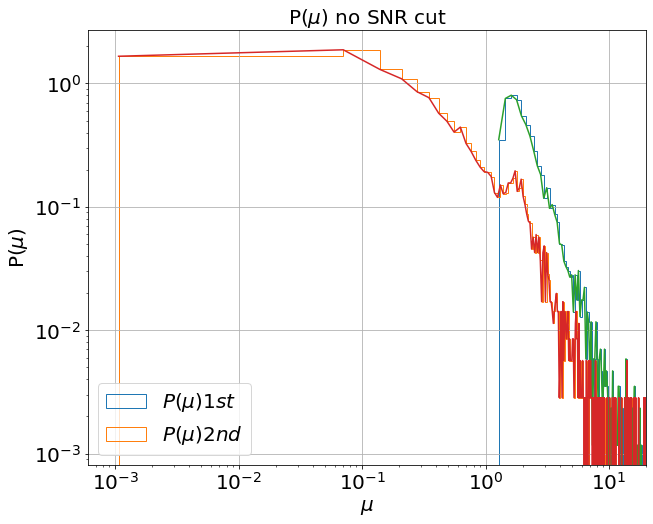

In [32]:
plt.figure(figsize=(10, 8))
hist_1st = plt.hist(abs(mu_result_1st), bins=500, density=True, histtype = 'step', label='$P(\mu) 1st$');
hist_2nd = plt.hist(abs(mu_result_2nd), bins=500, density=True, histtype = 'step', label='$P(\mu) 2nd$');

Pmu_1stl = hist_1st[0]; mu_1st = (hist_1st[1][0:-1])
Pmu_2ndl = hist_2nd[0]; mu_2nd = (hist_2nd[1][0:-1])

plt.plot(mu_1st, Pmu_1stl)
plt.plot(mu_2nd, Pmu_2ndl)


plt.xscale('log')
plt.yscale('log')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)

plt.xlabel(r'$\mu$', fontsize=20)
plt.ylabel(r'P($\mu$)', fontsize=20)
plt.title(r'P($\mu$) no SNR cut', fontsize=20)

plt.grid(True)

plt.xlim(0, 20)
#plt.ylim(0, 1)



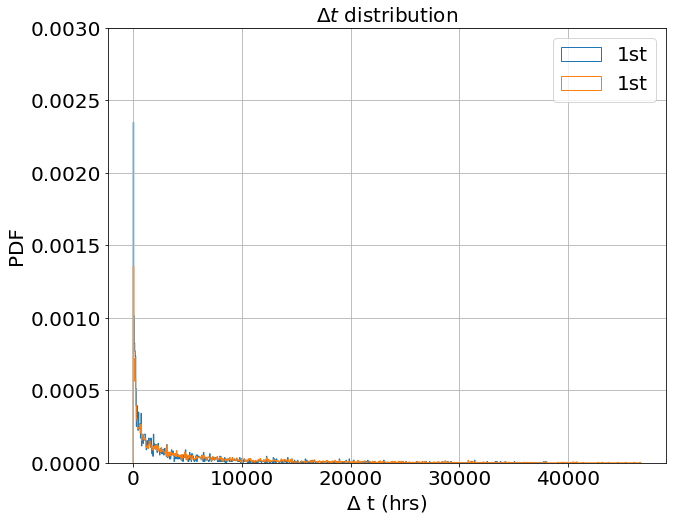

In [41]:
ind = np.where((np.transpose(magrho_result_ET_1st) >= 8.)*(np.transpose(magrho_result_ET_2nd) >= 8.))


plt.figure(figsize=(10, 8))
plt.hist(abs(delt_result_1st[ind]-delt_result_2nd[ind])/constantfei.yr_s*365*24, bins=800, density=True, histtype = 'step', label='1st');
plt.hist(abs(delt_result_1st-delt_result_2nd)/constantfei.yr_s*365*24, bins=800, density=True, histtype = 'step', label='1st');


#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(-4500, 1500)
plt.ylim(0, 0.003)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)

plt.xlabel(r'$\Delta$ t (hrs)', fontsize=20)
plt.ylabel(r'PDF', fontsize=20)
plt.title(r'$\Delta t$ distribution', fontsize=20)

plt.grid(True)

In [43]:
from astropy.table import Table, Column, MaskedColumn
t = Table([abs(delt_result_1st[ind]-delt_result_2nd[ind])/constantfei.yr_s*365*24], \
              names=['delt_result'], masked=True)
t.write(dir_out2+'delt_result_ref_300.fits', format='fits', overwrite=True) 


In [44]:
np.unique(abs(delt_result_1st-delt_result_2nd))

array([2.62844398e+02, 7.02520513e+02, 8.80651061e+02, ...,
       1.62986632e+08, 1.65763076e+08, 1.67952437e+08])

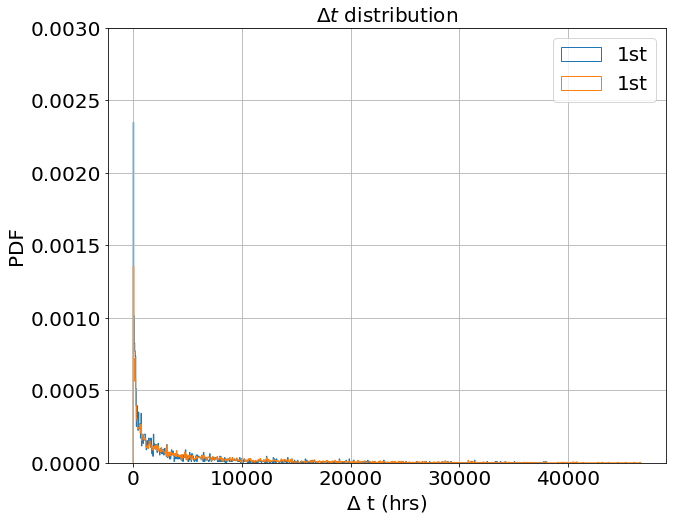

In [45]:
ind = np.where((np.transpose(magrho_result_ET_1st) >= 8.)*(np.transpose(magrho_result_ET_2nd) >= 8.))


plt.figure(figsize=(10, 8))
plt.hist(abs(delt_result_1st[ind]-delt_result_2nd[ind])/constantfei.yr_s*365*24, bins=800, density=True, histtype = 'step', label='1st');
plt.hist(abs(delt_result_1st-delt_result_2nd)/constantfei.yr_s*365*24, bins=800, density=True, histtype = 'step', label='1st');


#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(-4500, 1500)
plt.ylim(0, 0.003)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(fontsize=20)

plt.xlabel(r'$\Delta$ t (hrs)', fontsize=20)
plt.ylabel(r'PDF', fontsize=20)
plt.title(r'$\Delta t$ distribution', fontsize=20)

plt.grid(True)